# Milestone 4 - Independent Project

## Author - Kenji Oman

## Instructions

1. Generate a clear statement problem and provide location for dataset
2. Provide a clear solution to the problem for a non-technical audience
3. Visually explore the data to generate insight and include summary statistics
4. Use an appropriate statistical analysis method
5. Prepare the data via cleaning, normalization, encoding, et cetera
6. Generate and evaluate a working model (hypothesis, linear, or time series)
7. Draw direct inferences and conclusions from model results
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

# Outline/ Metadata
## Introduction
Housing prices have been significantly rising in the King County market, leading to an investment opportunity to homeowners.  As a result, competition for purchasing a home in this market can be very fierce (just take a look at postings on Zillow or Redfin, and you will see houses not even listed for a week undergoing bidding/ review -- realtors have told me a "typical" stable market has houses listed for 3 to 6 months before sale).  Considering the stiff competition and the opportunities for investment, let's consider what we can learn from the King County Housing Prices Dataset [from kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction/data).

## Problem Statement
_**Using the King County Housing Prices Dataset, what can be learned about what factors lead to higher-valued homes?**_

_As we haven't done very much with location based parameters, we won't do much with latitutde/ longitude other than strictly as a measure of things more north/south, or east/west.  In reality, though, [they say](https://www.thebalance.com/what-location-means-in-real-estate-1798766) "**location, location, location**" so distance to schools/ other landmarks, etc, should be taken into account (perhaps another notebook, once we learn about geospatial analysis more, could be dedicated to this)._

## Data Dictionary
We will use the [King County Housing Prices dataset from kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction/data), which contains the description:

> This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

For the columns, we have:

| Column | Description | type |
| --- | --- | --- |
| id | a notation for a house | numeric |
| date | Date house was sold | string |
| price | Price is prediction target | numeric |
| bedrooms | Number of Bedrooms/House | numeric |
| bathrooms | Number of bathrooms/bedrooms | numeric |
| sqft_living | square footage of the home | numeric |
| sqft_lot | square footage of the lot | numeric |
| floors | Total floors (levels) in house | numeric |
| waterfront | House which has a view to a waterfront | string |
| view | Has been viewed | string |
| condition | How good the condition is ( Overall ) | string |
| grade | overall grade given to the housing unit, <br /> based on King County grading system | string |
| sqft_above | square footage of house apart from basement | numeric |
| sqft_basement | square footage of the basement | numeric |
| yr_built | Built Year | numeric |
| yr_renovated | Year when house was renovated | numeric |
| zipcode | zip | numeric |
| lat | Latitude coordinate | numeric |
| long | Longitude coordinate | numeric |
| sqft_living15 | Living room area in 2015(implies-- some renovations) <br /> This might or might not have affected the lotsize area | numeric |
| sqft_lot15 | lotSize area in 2015(implies-- some renovations) | numeric |

Also, [from the King County Website](http://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), we find:

> **Grade** -- Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.)

And, [another website](https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html) claims "view" is actually a rating from 0-4 of how good the view from the place is (I think this is probably more likely)

## Conclusion
(see the end of this document for the conclusions)


# Data Loading/ Pre-processing

In [1]:
# For conversion of zipcodes to cities (cities are more
# intuitive). Source: http://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?ClientCode=capitolimpact&State=wa&StName=Washington&StFIPS=53&FIPS=53033
# and Google (for 98077): https://www.google.com/search?q=cities+in+98077
zipcodes = {98001: 'Algona,Auburn,FederalWay', 98002: 'Auburn', 98003: 'Auburn,FederalWay',
            98004: 'BeauxArtsVillage,Bellevue,ClydeHill,HuntsPoint,YarrowPoint', 98005: 'Bellevue',
            98006: 'Bellevue', 98007: 'Bellevue', 98008: 'Bellevue', 98009: 'Bellevue', 98010: 'BlackDiamond',
            98011: 'Bothell', 98013: 'Burton', 98013: 'Vashon', 98014: 'Carnation',
            98015: 'Bellevue', 98019: 'Duvall', 98022: 'Enumclaw', 98023: 'Auburn,FederalWay',
            98024: 'FallCity', 98025: 'Hobart', 98027: 'Issaquah', 98028: 'Kenmore,Bothell',
            98029: 'Issaquah', 98030: 'Kent', 98031: 'Kent', 98032: 'Kent', 98033: 'Kirkland',
            98034: 'Kirkland', 98035: 'Kent', 98038: 'MapleValley', 98039: 'Medina', 98040: 'MercerIsland',
            98041: 'Bothell', 98042: 'Covington,Kent', 98045: 'NorthBend', 98047: 'Auburn,Pacific',
            98050: 'Preston', 98051: 'Ravensdale', 98052: 'Redmond', 98053: 'Redmond', 98054: 'Redondo',
            98055: 'Renton', 98056: 'Newcastle,Renton', 98057: 'Renton', 98058: 'Renton',
            98059: 'Newcastle,Renton', 98062: 'Seahurst', 98063: 'Auburn,FederalWay', 98064: 'Kent',
            98065: 'Snoqualmie', 98068: 'SnoqualmiePass,Snoqualmie', 98070: 'Vashon', 98071: 'Auburn',
            98072: 'Woodinville', 98073: 'Redmond', 98074: 'Sammamish,Redmond', 98075: 'Sammamish',
            98075: 'Issaquah', 98077: 'CottageLake,Maltby,UnionHill-NoveltyHill',
            98083: 'Kirkland', 98092: 'Auburn', 98093: 'Auburn,FederalWay',
            98101: 'Seattle', 98102: 'Seattle', 98103: 'Seattle', 98104: 'Seattle', 98105: 'Seattle',
            98106: 'Seattle', 98107: 'Seattle', 98108: 'Seattle,Tukwila', 98109: 'Seattle',
            98111: 'Seattle', 98112: 'Seattle', 98114: 'Seattle', 98115: 'Seattle', 98116: 'Seattle',
            98117: 'Seattle', 98118: 'Seattle', 98119: 'Seattle', 98121: 'Seattle', 98122: 'Seattle',
            98124: 'Seattle', 98125: 'Seattle', 98126: 'Seattle', 98131: 'Seattle', 98132: 'Seattle',
            98133: 'Seattle,Shoreline', 98134: 'Seattle', 98136: 'Seattle', 98138: 'Seattle,Tukwila',
            98144: 'Seattle', 98145: 'Seattle', 98146: 'Burien,Seattle',
            98148: 'Burien,DesMoines,NormandyPark,Seatac,Seattle', 98154: 'Seattle',
            98155: 'LakeForestPark,Seattle,Shoreline', 98158: 'Seatac,Seattle', 98160: 'Seattle',
            98161: 'Seattle', 98164: 'Seattle', 98166: 'Burien,NormandyPark,Seattle',
            98168: 'Burien,Seatac,Seattle,Tukwila', 98171: 'Seattle', 98174: 'Seattle',
            98177: 'Seattle,Shoreline', 98178: 'Seattle,Tukwila', 98188: 'Seatac,Seattle,Tukwila',
            98198: 'DesMoines,NormandyPark,Seatac,Seattle', 98199: 'Seattle', 98224: 'Baring', 98288: 'Skykomish'}

In [2]:
# Location of dataset
file = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'

In [3]:
# Load necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.feature_selection
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.linear_model
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
from IPython.display import Markdown

In [4]:
# Load the data
df = pd.read_csv(file, parse_dates=['date', 'yr_built', 'yr_renovated'])
# Add the cities column
df['cities'] = df.zipcode.apply(lambda x: zipcodes[x])

# take a peak
with pd.option_context('max_columns', 10000):
    display(df.head())

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement   yr_built yr_renovated  zipcode      lat     long  \
0              0 1955-01-01            0    98178  47.5112 -122.257   
1            400 1951-01-01         1991    98125  47.7210 -122.319   
2              0 1933-01-01            0    98028  47.7379 -122.233   
3            910 1965-01-01            0    98136  47.5208 -122.393   
4              0 1987-01-01            0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15             cities  
0           1340        5650    Seattle,Tukwila  
1           1690        7639            Seattle  
2           2720        8062    Kenmore,Bothell  
3           1360        5000            Seattle  
4           1800        7503  Sammamish,Redmond

In [5]:
# Check the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null datetime64[ns]
yr_renovated     21613 non-null object
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
cities           21613 non-null object
dtypes: datetime64[ns](2)

Good, as a default processing, there weren't any null values, but we still see some nan values encoded as other variables (0 in the yr_renovated, for example. Basement also has 0 values for those places that don't have a basement, but let's leave that as the natural encoding of no basement).  Let's take care of this now.

In [6]:
# We see we need to update the yr_renovated column (wasn't converted to datetime format)
# First, convert 0 values to nan
df.loc[df.yr_renovated == '0', 'yr_renovated'] = np.nan

# Then, convert this column to datetime
df.yr_renovated = pd.to_datetime(df.yr_renovated, format='%Y')

# Set the month to July, since we didn't have one -- setting it to
# mid-way through the year. Also, for yr_built too, if the year built
# wasn't the same as the sale date (if it is, just set the month/ day
# to the same as the sale date)
df.yr_renovated = df.yr_renovated.apply(lambda x: x.replace(month=7))
df.yr_built = df.yr_built.apply(lambda x: x.replace(month=7))
mask = (df.yr_built.apply(lambda x: x.year) == df.date.apply(lambda x: x.year))
df.loc[(mask), 'yr_built'] = df[mask].date
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view        ...          sqft_above  \
0      5650     1.0           0     0        ...                1180   
1      7242     2.0           0     0        ...                2170   
2     10000     1.0           0     0        ...                 770   
3      5000     1.0           0     0        ...                1050   
4      8080     1.0           0     0        ...                1680   

   sqft_basement   yr_built  yr_renovated zipcode      lat     long  \
0              0 1955-07-01           NaT   98178  47.5112 -122.257   
1            400 1951-07-01    1991-07-01   98125  47.7210 -122.319   
2              0 1933-07-01           NaT   98028  47.7379 -122.233   
3            910 1965-07-01           NaT   98136  47.5208 -122.393   
4              0 1987-07-01           NaT   98074  47.6168 -122.045   

   sqft_living15  sqft_lot15             cities  
0           1340        5650    Seattle,Tukwila  
1           1690        7639            Seattle  
2           2720        8062    Kenmore,Bothell  
3           1360        5000            Seattle  
4           1800        7503  Sammamish,Redmond  

[5 rows x 22 columns]

In [7]:
# Actually, since we don't know what exactly was done when the property was renovated
# (if there were additional bedrooms made, etc), let's see if we can drop any properties that
# have undergone renovation.  To double check, we have for the number of properties without and
# with renovation (out of the total)
df[df.yr_renovated.isnull()].shape, df[~df.yr_renovated.isnull()].shape, df.shape

((20699, 22), (914, 22), (21613, 22))

In [8]:
# Check if lotsize or property size has changed for those that didn't
# have renovations
display((df[df.yr_renovated.isnull()].sqft_living != df[df.yr_renovated.isnull()].sqft_living15).sum())
(df[df.yr_renovated.isnull()].sqft_lot != df[df.yr_renovated.isnull()].sqft_lot15).sum()

18198

16441

In [9]:
# This is weird -- 18k properties don't match in terms of their living sqft back
# when they were originally built, and when measured in  2015??!!  Also,
# this is the case for lot size too (for 16k properties)??  Let's double check again
df.loc[df.yr_renovated.isnull(), ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].head(20).T

0      2     3     4       5     6     7     8     9     10  \
sqft_living    1180    770  1960  1680    5420  1715  1060  1780  1890  3560   
sqft_lot       5650  10000  5000  8080  101930  6819  9711  7470  6560  9796   
sqft_living15  1340   2720  1360  1800    4760  2238  1650  1780  2390  2210   
sqft_lot15     5650   8062  5000  7503  101930  6819  9711  8113  7570  8925   

                 11     12     13    14    15     16    17    18    19    20  
sqft_living    1160   1430   1370  1810  2950   1890  1600  1200  1250  1620  
sqft_lot       6000  19901   9680  4850  5000  14040  4300  9850  9774  4980  
sqft_living15  1330   1780   1370  1360  2140   1890  1610  1060  1280  1400  
sqft_lot15     6000  12697  10208  4850  4000  14018  4300  5095  8850  4980

So, it looks like, indeed, even for properties "not renovated" (as in, they were encoded as having a renovation year of 0), there are differences between the living sqft and lot size from the original numbers to those quoted in 2015.

Basically, we don't know which of these numbers is right, so let's not drop any properties (even if they say they've been renovated), and just drop the year renovated column (as it apparently doesn't track renovations happening very well -- alternatively, maybe how property sizes is measured has changed?????).

In [10]:
# Drop the year renovated column, as it apparently is pretty bad at tracking
# actual renovations happening.
df = df.drop(columns=['yr_renovated'])

In [11]:
# Now, show a summary of all the columns
with pd.option_context('max_columns', 1000):
    display(df.describe(include='all'))

id                 date         price      bedrooms  \
count   2.161300e+04                21613  2.161300e+04  21613.000000   
unique           NaN                  372           NaN           NaN   
top              NaN  2014-06-23 00:00:00           NaN           NaN   
freq             NaN                  142           NaN           NaN   
first            NaN  2014-05-02 00:00:00           NaN           NaN   
last             NaN  2015-05-27 00:00:00           NaN           NaN   
mean    4.580302e+09                  NaN  5.400881e+05      3.370842   
std     2.876566e+09                  NaN  3.671272e+05      0.930062   
min     1.000102e+06                  NaN  7.500000e+04      0.000000   
25%     2.123049e+09                  NaN  3.219500e+05      3.000000   
50%     3.904930e+09                  NaN  4.500000e+05      3.000000   
75%     7.308900e+09                  NaN  6.450000e+05      4.000000   
max     9.900000e+09                  NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean        2.114757   2079.899736  1.510697e+04      1.494309      0.007542   
std         0.770163    918.440897  4.142051e+04      0.539989      0.086517   
min         0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%         1.750000   1427.000000  5.040000e+03      1.000000      0.000000   
50%         2.250000   1910.000000  7.618000e+03      1.500000      0.000000   
75%         2.500000   2550.000000  1.068800e+04      2.000000      0.000000   
max         8.000000  13540.000000  1.651359e+06      3.500000      1.000000   

                view     condition         grade    sqft_above  sqft_basement  \
count   21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
first            NaN           NaN           NaN           NaN            NaN   
last             NaN           NaN           NaN           NaN            NaN   
mean        0.234303      3.409430      7.656873   1788.390691     291.509045   
std         0.766318      0.650743      1.175459    828.090978     442.575043   
min         0.000000      1.000000      1.000000    290.000000       0.000000   
25%         0.000000      3.000000      7.000000   1190.000000       0.000000   
50%         0.000000      3.000000      7.000000   1560.000000       0.000000   
75%         0.000000      4.000000      8.000000   2210.000000     560.000000   
max         4.000000      5.000000     13.000000   9410.000000    4820.000000   

                   yr_built       zipcode           lat          long  \
count                 21613  21613.000000  21613.000000  21613.000000   
unique                  293           NaN           NaN           NaN   
top     2006-07-01 00:00:00           NaN           NaN           NaN   
freq                    454           NaN           NaN           NaN   
first   1900-07-01 00:00:00           NaN           NaN           NaN   
last    2015-07-01 00:00:00           NaN           NaN           NaN   
mean                    NaN  98077.939805     47.560053   -122.213896   
std                     NaN     53.505026      0.138564      0.140828   
min                     NaN  98001.000000     47.155900   -122.519000   
25%      

In [12]:
# And, the number of unique entries per column (looking
# for categorical columns)
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           293
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
cities              38
dtype: int64

From the above, it looks like we have as categorical columns:
* waterfront
* view
* condition
* grade
* cities (although, this has a lot of unique entries, so let's not use it in general)
* id -- the unique identifier of each property, is of course categorical, but shouldn't correlate with too many other features (unless it's perhaps correlated with time, and time is correlated with trends in housing development, etc).

Let's set these as category types.

In [13]:
# set our category columns as category types
categorical_cols = 'waterfront view condition grade'.split()
df = df.astype({x: pd.api.types.CategoricalDtype(list(range(df[x].min(), df[x].max() + 1)), ordered=True)
                for x in categorical_cols})
# and also set cities as categorical
df = df.astype({'cities': 'category', 'id': 'category'})
df.dtypes

id                     category
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built         datetime64[ns]
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
cities                 category
dtype: object

In [14]:
# Let's take a look at what these columns look like
display(df[categorical_cols].apply(pd.Series.value_counts))
display(df.cities.value_counts())
print("\n\nProperties sold more than once:", df.id.value_counts()[df.id.value_counts() > 1].shape[0])

waterfront     view  condition   grade
0      21450.0  19489.0        NaN     NaN
1        163.0    332.0       30.0     1.0
2          NaN    963.0      172.0     0.0
3          NaN    510.0    14031.0     3.0
4          NaN    319.0     5679.0    29.0
5          NaN      NaN     1701.0   242.0
6          NaN      NaN        NaN  2038.0
7          NaN      NaN        NaN  8981.0
8          NaN      NaN        NaN  6068.0
9          NaN      NaN        NaN  2615.0
10         NaN      NaN        NaN  1134.0
11         NaN      NaN        NaN   399.0
12         NaN      NaN        NaN    90.0
13         NaN      NaN        NaN    13.0

Seattle                                                       6050
Issaquah                                                      1092
Bellevue                                                      1090
Redmond                                                        979
Kirkland                                                       977
Newcastle,Renton                                               874
Auburn,FederalWay                                              779
Seattle,Shoreline                                              749
Renton                                                         723
Kent                                                           655
MapleValley                                                    590
Auburn                                                         550
Covington,Kent                                                 548
Seattle,Tukwila                                                448
LakeForestPark,Seattle,Shoreline                              



Properties sold more than once: 176


The categorical_cols looks more or less like we'd expect (not a lot of waterfront properties or those with much of a view, most places aren't horribly maintained, but some are, and there is a wide distribution in terms of building materials).  For cities, we have a large distribution of locations represented, with the majority appearing out in Seattle -- interestingly, Issaquah is the second highest location! (athough, there is a long tail of other cities too).  Perhaps 2014-2015 was a growth year for Issaquah?  Also, there were 176 properties that were sold more than once within May 2nd, 2014 to May 27th, 2015 (the time range of our dataset).

Now, let's calculate the age of the properties, since this is probably more indicative of sales price (although, obviously, age is correlated to build year).

In [15]:
# Create an age column
df['age'] = (df.date - df.yr_built)
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront view    ...     sqft_above sqft_basement  \
0      5650     1.0          0    0    ...           1180             0   
1      7242     2.0          0    0    ...           2170           400   
2     10000     1.0          0    0    ...            770             0   
3      5000     1.0          0    0    ...           1050           910   
4      8080     1.0          0    0    ...           1680             0   

    yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  \
0 1955-07-01    98178  47.5112 -122.257           1340        5650   
1 1951-07-01    98125  47.7210 -122.319           1690        7639   
2 1933-07-01    98028  47.7379 -122.233           2720        8062   
3 1965-07-01    98136  47.5208 -122.393           1360        5000   
4 1987-07-01    98074  47.6168 -122.045           1800        7503   

              cities        age  
0    Seattle,Tukwila 21654 days  
1            Seattle 23172 days  
2    Kenmore,Bothell 29824 days  
3            Seattle 18058 days  
4  Sammamish,Redmond 10094 days  

[5 rows x 22 columns]

In [16]:
# we see for the age column, time differences are given in days.
# And, indeed, this column is a timedelta type
df.dtypes

id                      category
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront              category
view                    category
condition               category
grade                   category
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
cities                  category
age              timedelta64[ns]
dtype: object

In [17]:
# Just to check, we can recover how many years this
# is, via:
df.age.astype('timedelta64[Y]').head()

0    59.0
1    63.0
2    81.0
3    49.0
4    27.0
Name: age, dtype: float64

With our work above, it looks like our data pre-processing looks good.  However, upon further consideration (that the time this dataset represents is house sales between May 2014 and May 2015), let's drop the original sqft_living and sqft_lot columns, as the measurments done in 2015 are likely more accurate (especially, in relationg to the sales price).  We recognize that other size metrics (sqft_above or sqft_basement) are probably off as well, but we'll keep them as they are likely correlated to the true values.

In [18]:
# Drop the original living and lot sizes.
df = df.drop(columns=['sqft_living', 'sqft_lot'])

Now, let's move to data exploration

# EDA
First, let's look at how related the different columns are to each other via their correlation.

## Correlation Clustering

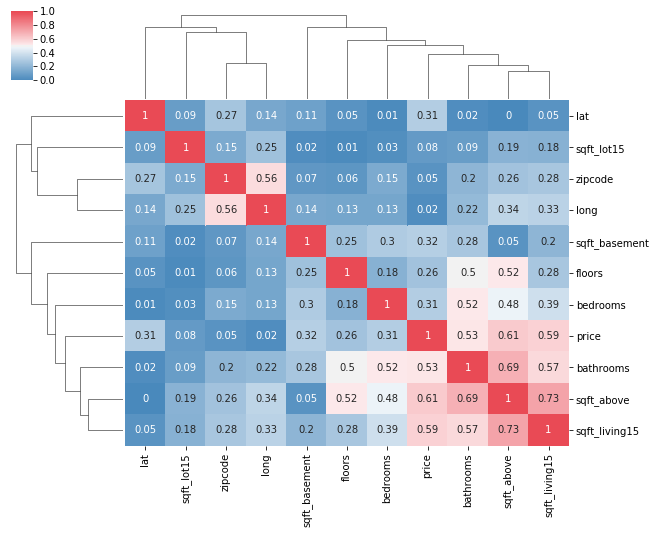

In [19]:
# Examine correlation clustering (strength of correlations, not
# direction)
display(Markdown('## Correlation Clustering'))
cmap = sns.diverging_palette(242, 10, l=55, as_cmap=True)
sns.clustermap(df.corr().round(2).abs(), cmap=cmap, annot=True, figsize=(10,8))
plt.show()

### Summary
Interestingly, from the above:
* zipcode, longitude, and latitude cluster together.  As these are all location coding parameters, this makes sense.
* the lot size is clustered with location -- this also makes sense as houses in more urban areas are less likely to have large lot sizes, while houses in more rural areas are more likely to have larger lot sizes, and the kinds of features built into a house (number of bedrooms, etc), are also likely to be more similar/ different based on location.
* All the other features are related to some degree to the size of the house, although interestingly, the size of a basement as well as the number of floors is the least related to these other features, and the number of bedrooms is next in the level of dis-similarity.  This is probably because you can have bigger houses without a basement or other stories, and you can also increase the size of the house without changing the number of bedrooms (just have larger bedrooms).  But, in general, people try to have bathrooms within easy access, so as the size of the house increases, so will the number of bathrooms.

Also, we see that age wasn't included in this clustering (probably since it was of time-delta type), so let's try including this by looking at how old (years) the house is:

## Correlation Clustering with Age

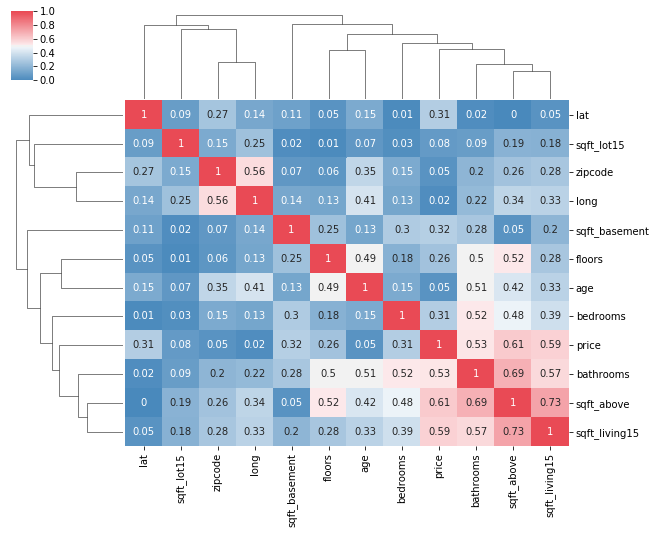

In [20]:
# Include age in the correlation clustering
display(Markdown('## Correlation Clustering with Age'))
sns.clustermap(df.astype({'age': 'timedelta64[Y]'}).corr().round(2).abs(), cmap=cmap, annot=True, figsize=(10,8))
plt.show()

### Summary
It looks like if we include the age of the homes, it is most closely related to the number of floors (we'd have to check the direction of the correlation, but perhaps as technology progressed, builders were more willing to build multi-story homes).  Let's look at the scatter matrix of these features to see if there are any non-linear effects going on as well.

## Scattermatrix

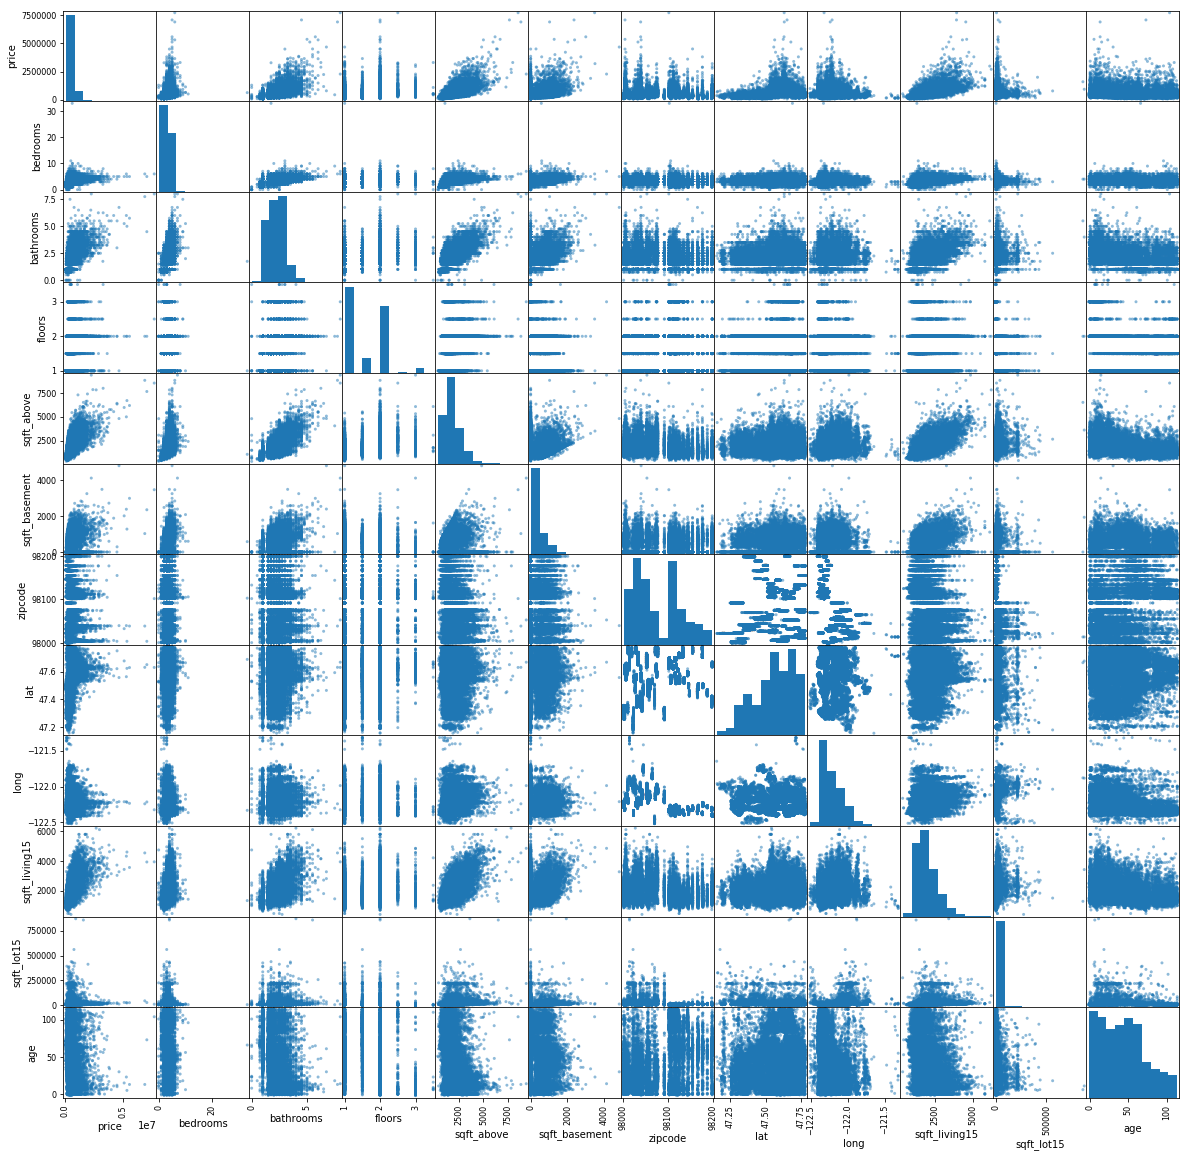

In [21]:
# Make a scattermatrix
display(Markdown('## Scattermatrix'))
pd.plotting.scatter_matrix(df.astype({'age': 'timedelta64[Y]'}).drop(columns=['id']), figsize=(20,20))
plt.show()

It looks like there is one unit with a large (~30?) bedrooms, but it is definitely on the lower end of the price spectrum, so let's take a look at it some more.

### Outlier Analysis

In [22]:
# Grab the peroperty with a large number of bedrooms
with pd.option_context('max_columns', 1000):
    display(df[df.bedrooms > 20])
    
# Let's also look at the max number of bedrooms, excluding this one
df[df.bedrooms <= 20].bedrooms.value_counts(sort=False)

id       date     price  bedrooms  bathrooms  floors  \
15870  2402100895 2014-06-25  640000.0        33       1.75     1.0   

      waterfront view condition grade  sqft_above  sqft_basement   yr_built  \
15870          0    0         5     7        1040            580 1947-07-01   

       zipcode      lat     long  sqft_living15  sqft_lot15   cities  \
15870    98103  47.6878 -122.331           1330        4700  Seattle   

             age  
15870 24466 days

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

As we thought, there is only one entry with over 20 bedrooms (and, actually, the next highest is 11), so this is likely a data entry error -- if not, even if bedrooms were the only thing in the property, this would amount to each bedroom taking 49.1 square feet, (a $5 \times 10$ foot bedroom), which isn't very big at all -- more like a large closet per room.  Let's look at the numbers for other 3-bedroom properties to make as a comparison.

In [23]:
# Other 3-bedroom properties, to see how our one "33 bedroom"
# property compares
with pd.option_context('max_columns', 1000):
    display(df[df.bedrooms == 3].astype({'age': 'timedelta64[Y]'}).drop(columns=['id']).describe(include='all'))

date         price  bedrooms    bathrooms       floors  \
count                  9824  9.824000e+03    9824.0  9824.000000  9824.000000   
unique                  355           NaN       NaN          NaN          NaN   
top     2014-06-23 00:00:00           NaN       NaN          NaN          NaN   
freq                     71           NaN       NaN          NaN          NaN   
first   2014-05-02 00:00:00           NaN       NaN          NaN          NaN   
last    2015-05-14 00:00:00           NaN       NaN          NaN          NaN   
mean                    NaN  4.662321e+05       3.0     1.968394     1.449410   
std                     NaN  2.624698e+05       0.0     0.629864     0.561893   
min                     NaN  8.200000e+04       3.0     0.750000     1.000000   
25%                     NaN  2.954875e+05       3.0     1.500000     1.000000   
50%                     NaN  4.130000e+05       3.0     2.000000     1.000000   
75%                     NaN  5.600000e+05       3.0     2.500000     2.000000   
max                     NaN  3.800000e+06       3.0     4.500000     3.500000   

        waterfront    view  condition   grade   sqft_above  sqft_basement  \
count       9824.0  9824.0     9824.0  9824.0  9824.000000    9824.000000   
unique         2.0     5.0        5.0    10.0          NaN            NaN   
top            0.0     0.0        3.0     7.0          NaN            NaN   
freq        9760.0  9038.0     6308.0  4917.0          NaN            NaN   
first          NaN     NaN        NaN     NaN          NaN            NaN   
last           NaN     NaN        NaN     NaN          NaN            NaN   
mean           NaN     NaN        NaN     NaN  1584.442284     221.394951   
std            NaN     NaN        NaN     NaN   573.570701     351.443102   
min            NaN     NaN        NaN     NaN   490.000000       0.000000   
25%            NaN     NaN        NaN     NaN  1180.000000       0.000000   
50%            NaN     NaN        NaN     NaN  1440.000000       0.000000   
75%            NaN     NaN        NaN     NaN  1830.000000     430.000000   
max            NaN     NaN        NaN     NaN  5480.000000    2590.000000   

                   yr_built       zipcode          lat         long  \
count                  9824   9824.000000  9824.000000  9824.000000   
unique                  213           NaN          NaN          NaN   
top     1977-07-01 00:00:00           NaN          NaN          NaN   
freq                    211           NaN          NaN          NaN   
first   1900-07-01 00:00:00           NaN          NaN          NaN   
last    2015-07-01 00:00:00           NaN          NaN          NaN   
mean                    NaN  98076.478217    47.551478  -122.213344   
std                     NaN     53.724672     0.146264     0.144433   
min                     NaN  98001.000000    47.155900  -122.519000   
25%                     NaN  98031.000000    47.444275  -122.331000   
50%                     NaN  98059.000000    47.565050  -122.231000   
75%                     NaN  98117.000000    47.680000  -122.125000   
max                     NaN  98199.000000    47.777600  -121.315000   

        sqft_living15     sqft_lot15   cities          age  
count     9824.000000    9824.000000     9824  9824.000000  
unique            NaN            NaN       38          NaN  
top               NaN            NaN  Seattle          NaN  
freq              NaN            NaN     2614          NaN  
first             NaN            NaN      NaN          NaN  
last              NaN            NaN      NaN          NaN  
mean      1835.443506   12809.343648      NaN    42.010179  
std        541.362922   27249.179317      NaN    27.219804  
min        399.000000     651.000000      NaN    -2.000000  
25%       1450.000000    5001.000000      NaN    21.000000  
50%       1720.000000    7688.500000      NaN    38.000000  
75%       2130.000000    9998.000000      NaN    59.000000  
max       4950.000000

## Updated Scattermatrix

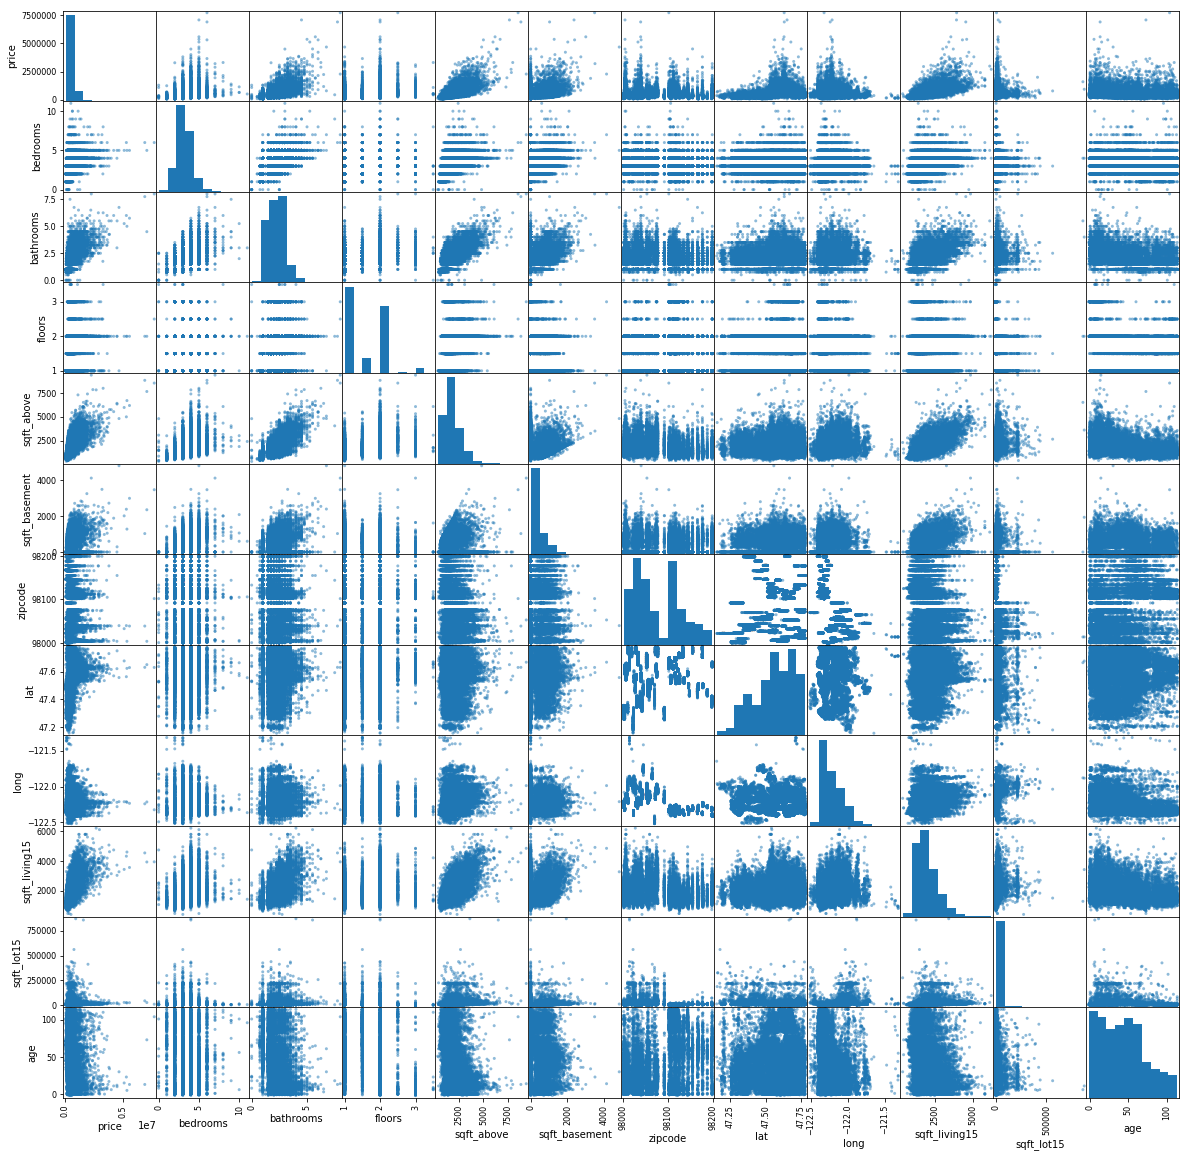

In [24]:
# With that, I am fairly convinced that this is a recording error
# (the values for this one property are right in the middle of other
# 3 bedroom properties), so let's fix it and re-make our scatter_matrix
df.loc[df.bedrooms == 33, 'bedrooms'] = 3

display(Markdown('## Updated Scattermatrix'))
pd.plotting.scatter_matrix(df.astype({'age': 'timedelta64[Y]'}).drop(columns=['id']), figsize=(20,20))
plt.show()

### Summary
From the above, we see:
* One location with the largest lot size is quite large (~1.6 million square feet?!)  However, there is a tail of other lot sizes that are reaching out to this limit, so this is likely a real value.
* There seems to be a gap in the longitude between the bulk of the properties and one set that are clustered $\gtrsim -121.5^{\circ}$ (these are further east then the bulk, so maybe out in Issaquah?? -- but Issaquah had ~1k properties sold, so these must be even further east ...)
* As houses get older, there seems to be an overall downward trend in the price, number of bathrooms, living size, lot size, basement size, and maybe even the number of floors.  This makes sense, as older homes in general do cost less, and would probably have less bathrooms (harder to do plumbing for a bathroom, so with technology getting better over time, it was easier and easier to have some more bathrooms).
* Overall, there are quite a few features that were roughly linear with each other.
* Really -- there are some properties without a bathroom??  Although I find this surprising, as there are multiple properties like this, I'll just have to trust the data ... (sad, for those people in these locations).  They all have small lot sizes, though, so perhaps there is a communal bath that they share.
* Interestingly, the properties with the highest sales prices don't have that large of a lot, but do have a fairly large house.  I'm guessing these properties are in certain locations (such as Medina/ Bellevue), and as such, won't have room for super large lot sizes.

Let's now take a look at how some of these features relate to our categorical variables.

## Categorical Variables

### vs Numerical Variable

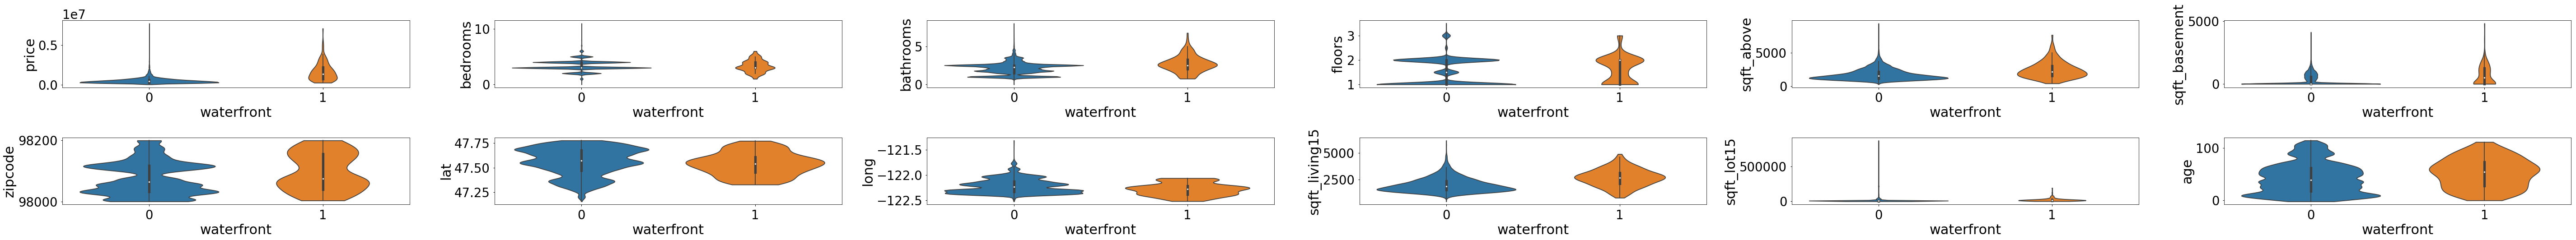

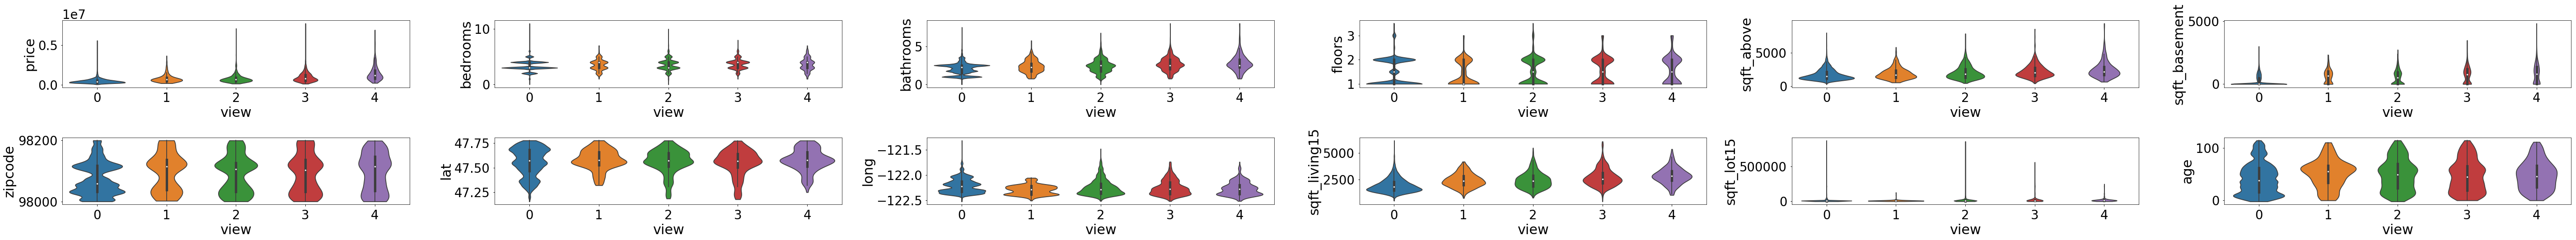

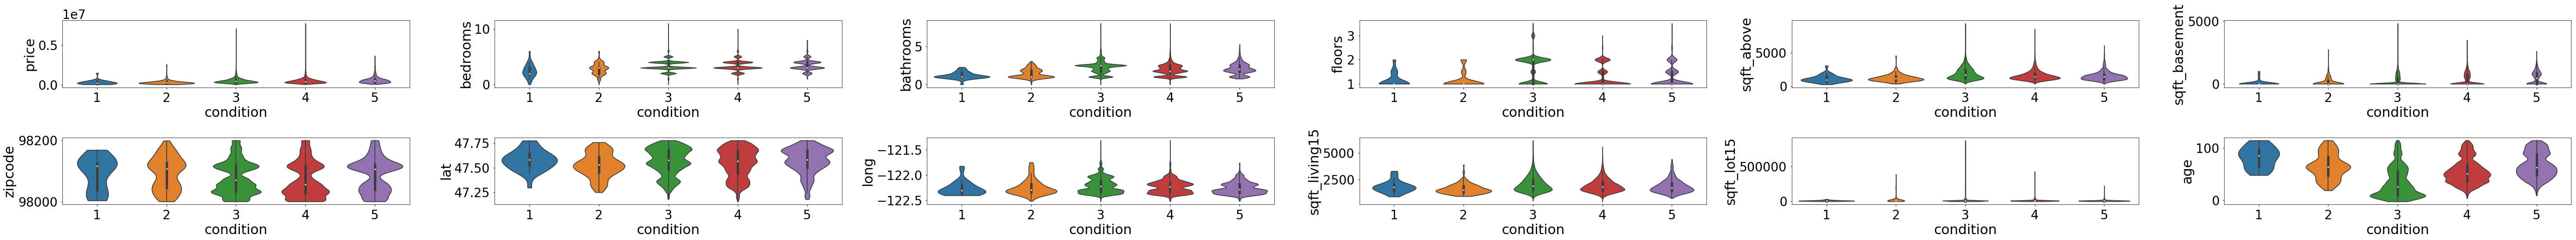

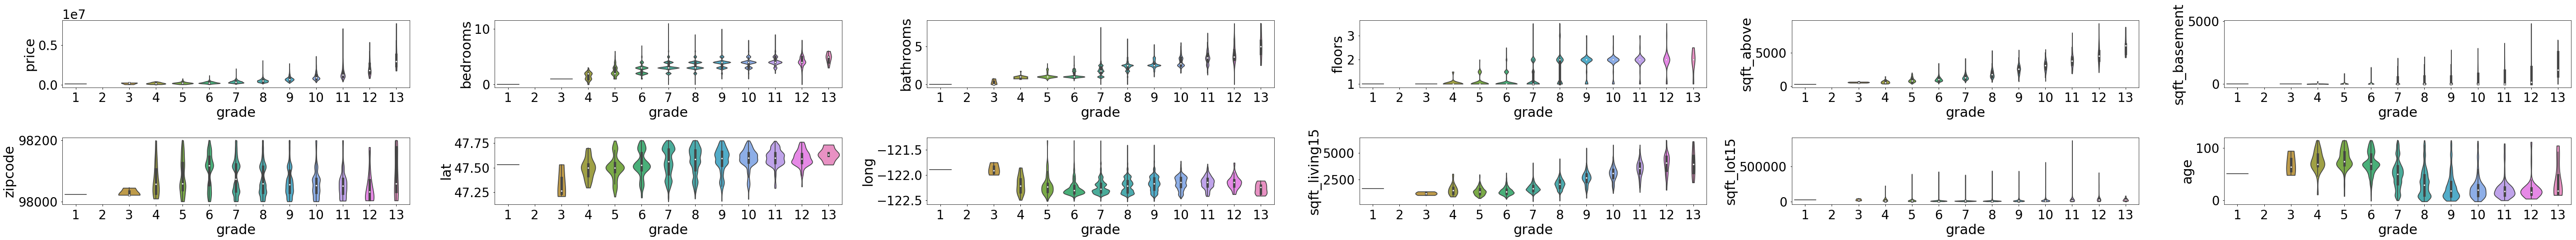

In [25]:
# Make boxplots with x/colors mapped to different categoriacal columns
display(Markdown('### vs Numerical Variable'))
with sns.plotting_context("notebook", font_scale=2.75):
    for cat in categorical_cols:
        f = plt.figure(figsize=(80, 8))
        i = 0
        for col in [x for x in df.columns
                    if x not in (['id', 'date', 'yr_built', 'cities'] + categorical_cols)]:
            i += 1
            ax = f.add_subplot(2, 6, i)
            ax = sns.violinplot(data=df.astype({'age': 'timedelta64[Y]'}), x=cat, y=col, ax=ax, scale='area',
                               cut=0)
        plt.tight_layout()
        plt.show()

### vs Lot Size

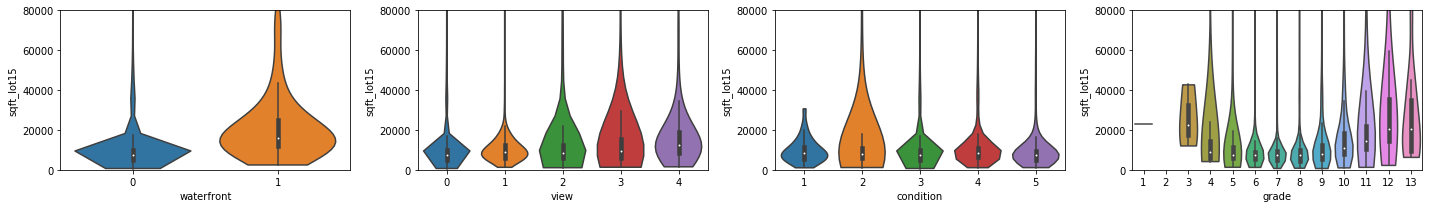

In [26]:
# The lot size is the main feature that can't really be distinguished
# (since there are so many outliers).  Let's re-plot this, truncating
# the axis
display(Markdown('### vs Lot Size'))
f = plt.figure(figsize=(20, 3))
i = 0
for cat in categorical_cols:
    i += 1
    ax = f.add_subplot(1, 4, i)
    ax = sns.violinplot(data=df.astype({'age': 'timedelta64[Y]'}), x=cat, y='sqft_lot15', ax=ax, scale='width',
                     cut=0)
    ax.set_ylim((0,80000))
plt.tight_layout()
plt.show()

### Categorical Variable Counts

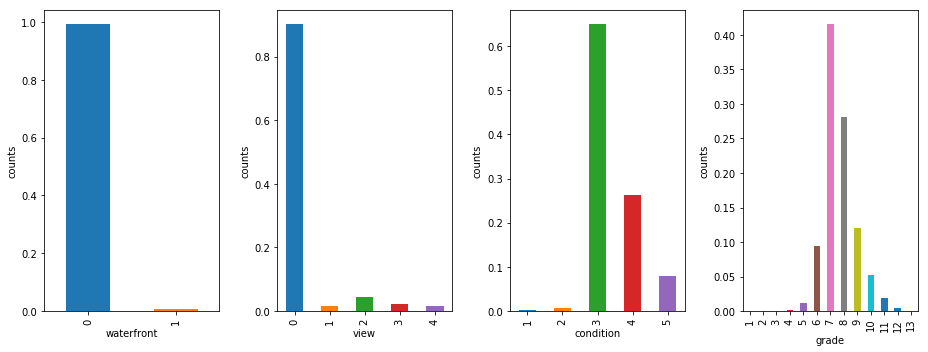

In [27]:
# Don't visualize the relative counts in each of the categories before,
# so make bar plot to show relative counts of each member
display(Markdown('### Categorical Variable Counts'))
f = plt.figure(figsize=(13,5))
i = 0
for cat in categorical_cols:
    i += 1
    ax = f.add_subplot(1, 4, i)
    df[cat].value_counts(sort=False, normalize=True).plot.bar(ax=ax)
    ax.set_xlabel(cat)
    ax.set_ylabel('counts')
plt.tight_layout()
plt.show()

### Summary
From just the counts of the respective categories (we had some of this before, when we were checking the values of these categorical columns):
* For waterfront and view, the _**vast**_ majority of properties are not on the waterfront, and don't have a greate view, which is to be expected.
* The vast majority of peroperties are at condition 3 or higher, with only a very small number at a worse condition.
* Grade is more evenly distributed, but doesn't really pick up until grade 6, and tails off by about grade 10.

From how these categories relate to the other variables:
* Waterfront -- as expected, it is correlated with higher sales price and greater house size (including basement size, if it has it, although a smaller fraction of waterfront properties seem to have a basement)
* View -- There seems to be a slight increase in price and property size, but it is fairly subtle. Interestingly, at least half the properties without a view don't have a basement.  Perhaps these are "condo" type properties that are in the middle of a city (and so don't have a good view, or a basement).
* Condition -- As expected, the lowest condition properties tend to be older, while as condition rises, age seems to decrease.  However, some of the best maintained properties also are older, so this isn't a strict rule.  Also, interestingly, condition seems to be related to property size (where even the number of bathrooms, which is related to property size, is affected) -- however, there is a large amount of variability, so this may not come out as significant.
* Grade -- As expected, price increases with increasing grade, and we see once again that the number of bathrooms seems to be a proxy for property size or price.  Interestingly, there are long tales of properties for the number of bedrooms a property has based on grade, and these tales seem to flip flop in direction (pointing up or down) -- perhaps people alternate in their decisions of if they should use more expensive materials, or more bedrooms (or, perhaps there is no real signal, and this is just random flucuations in direction).  Finally, houses made with higher quality materials tend to be newer, except for the highest quality materials, which havea larger spectrum of ages (perhaps these are made from stone, which has been around forever, but is also considered a high-quality building material for its longevity).
* Lot size:
  * Areas with a waterfront tend to have a larger lot (perhaps to be expected?, since they lead up to a beach of some kind), although properties with the largest lot do not have a waterfront.
  - The lowest condition properties have a greater variability in lot size (extending upwards in lot size).  Perhaps with larger lot sizes, it becomes harder to maintain?
  - The right half of lot size vs grade (grade $\gtrsim 7$) is as expected -- the more wealthy someone is (measured by the quality of materials they can purchase for their home), the larger the lot they will also likely have.  For the left side of the plot, perhaps this is similar to condition -- if resources have been spread thin over a wide area for people that are not as wealthy, then people will have to use lower-grade materials to compensate/ spread out their limited resources.

Now that we've gotten a grasp of what our data looks like in general, let's now specifically address our question -- how do different features relate to Price?

## Relationship to Price
### Categorical vs Price

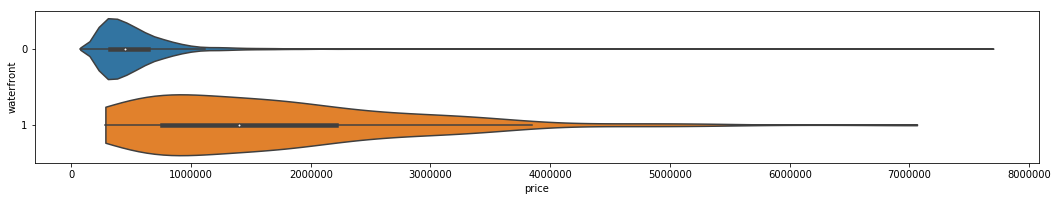

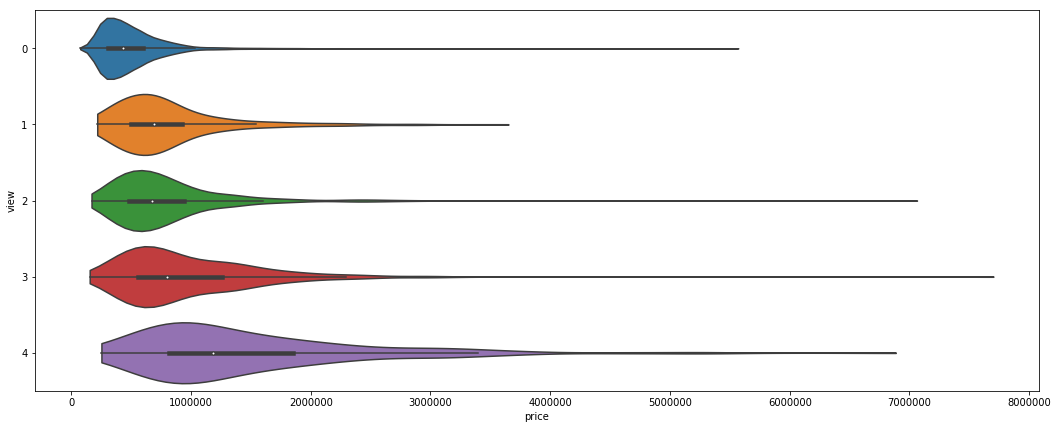

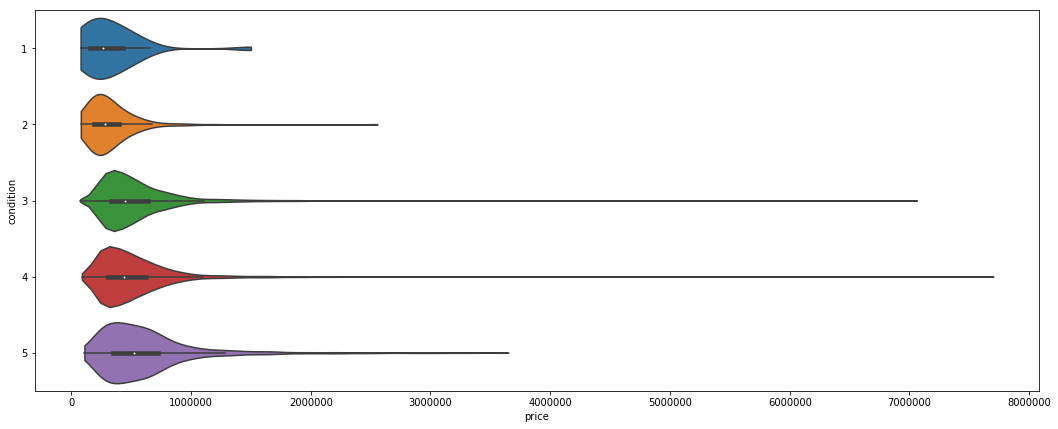

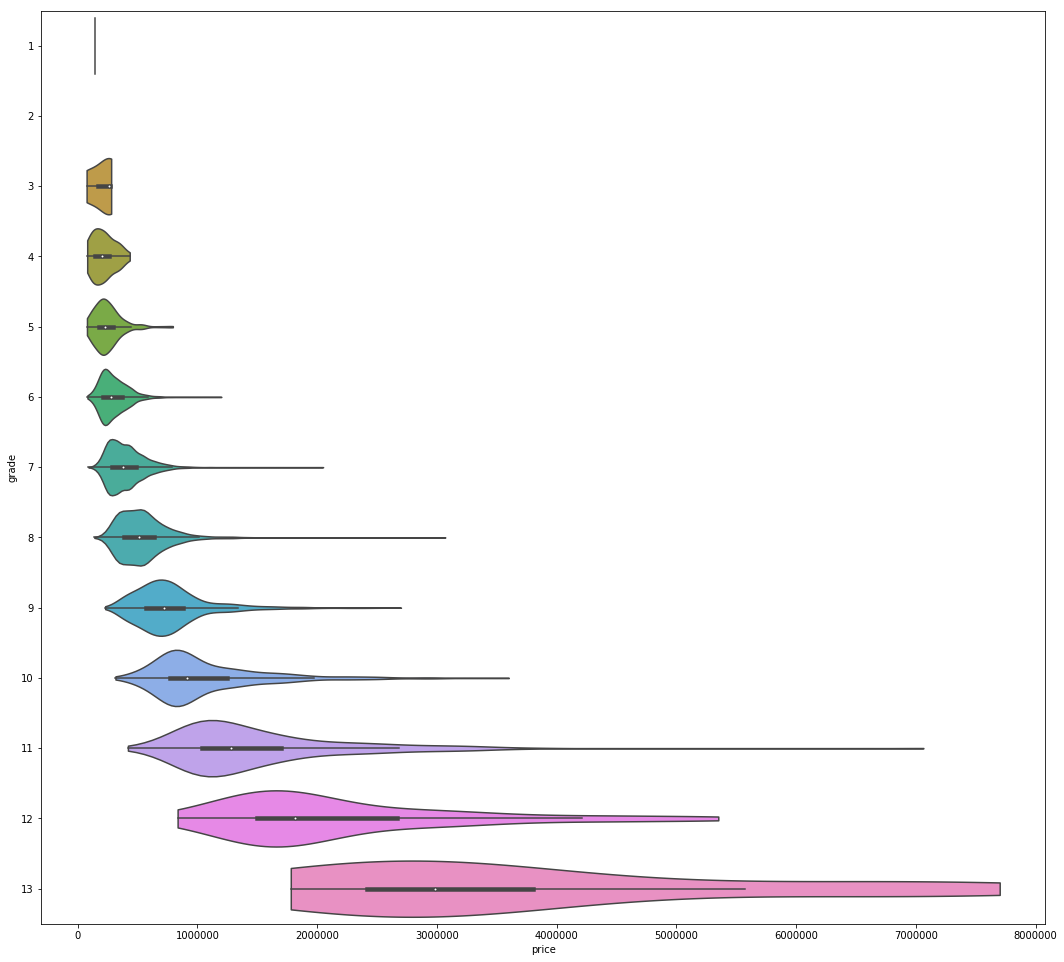

In [28]:
# First, let's look how the different categorical variables are distributed with price
for cat in categorical_cols:
    height = df[cat].nunique()
    f = plt.figure(figsize=(18,height*1.4))
    ax = f.add_subplot(111)
    sns.violinplot(y=cat, x='price', data=df, ax=ax, cut=0, scale='width')
    #sns.swarmplot(y=cat, x='price', data=df.sample(frac=0.1), ax=ax)
    plt.show()

As expected, price increases with increasing quality for if a property has a waterfront, view, condition of the property, and the grade of materials used to build it.  However, it looks like there is a fair amount of variability, and so prices don't seem to go up significantly until the view gets really good (hits 4 and 5), and price is only negatively impacted for condition if the condition is bad (1 or 2) -- otherwise, not much of a gain in price until condition is 5.  Also, although price increases for the grade of the materials being used, so does the amount of variability in price -- there are likely other factors that are contributing to what the final price will be for these higher-grade properties.

### Price and Numerical Variables

In [29]:
# First, need to make a long form of the data, to make it easier to plot everything
df_long = df.astype({'age': 'timedelta64[Y]'})\
    .melt(id_vars=['price'] + categorical_cols,
          value_vars=[x for x in df.columns if x not in (['id', 'date', 'yr_built', 'cities', 'price', 'zipcode']
                                                         + categorical_cols)],
          var_name='n', value_name='n_val')
df_long = df_long.melt(id_vars=['price', 'n', 'n_val'], value_vars=categorical_cols,
                       var_name='c', value_name='c_val')
df_long.head()

price         n  n_val           c c_val
0  221900.0  bedrooms    3.0  waterfront     0
1  538000.0  bedrooms    3.0  waterfront     0
2  180000.0  bedrooms    2.0  waterfront     0
3  604000.0  bedrooms    4.0  waterfront     0
4  510000.0  bedrooms    3.0  waterfront     0

#### waterfront

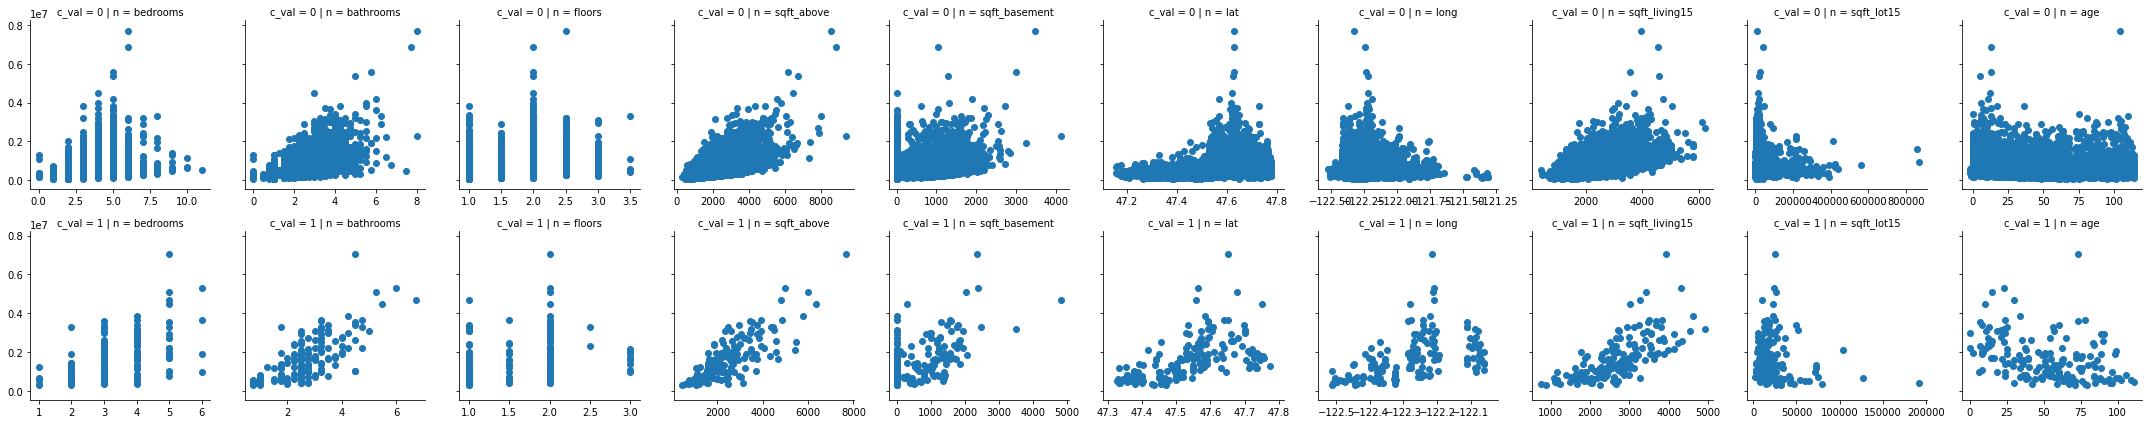

#### view

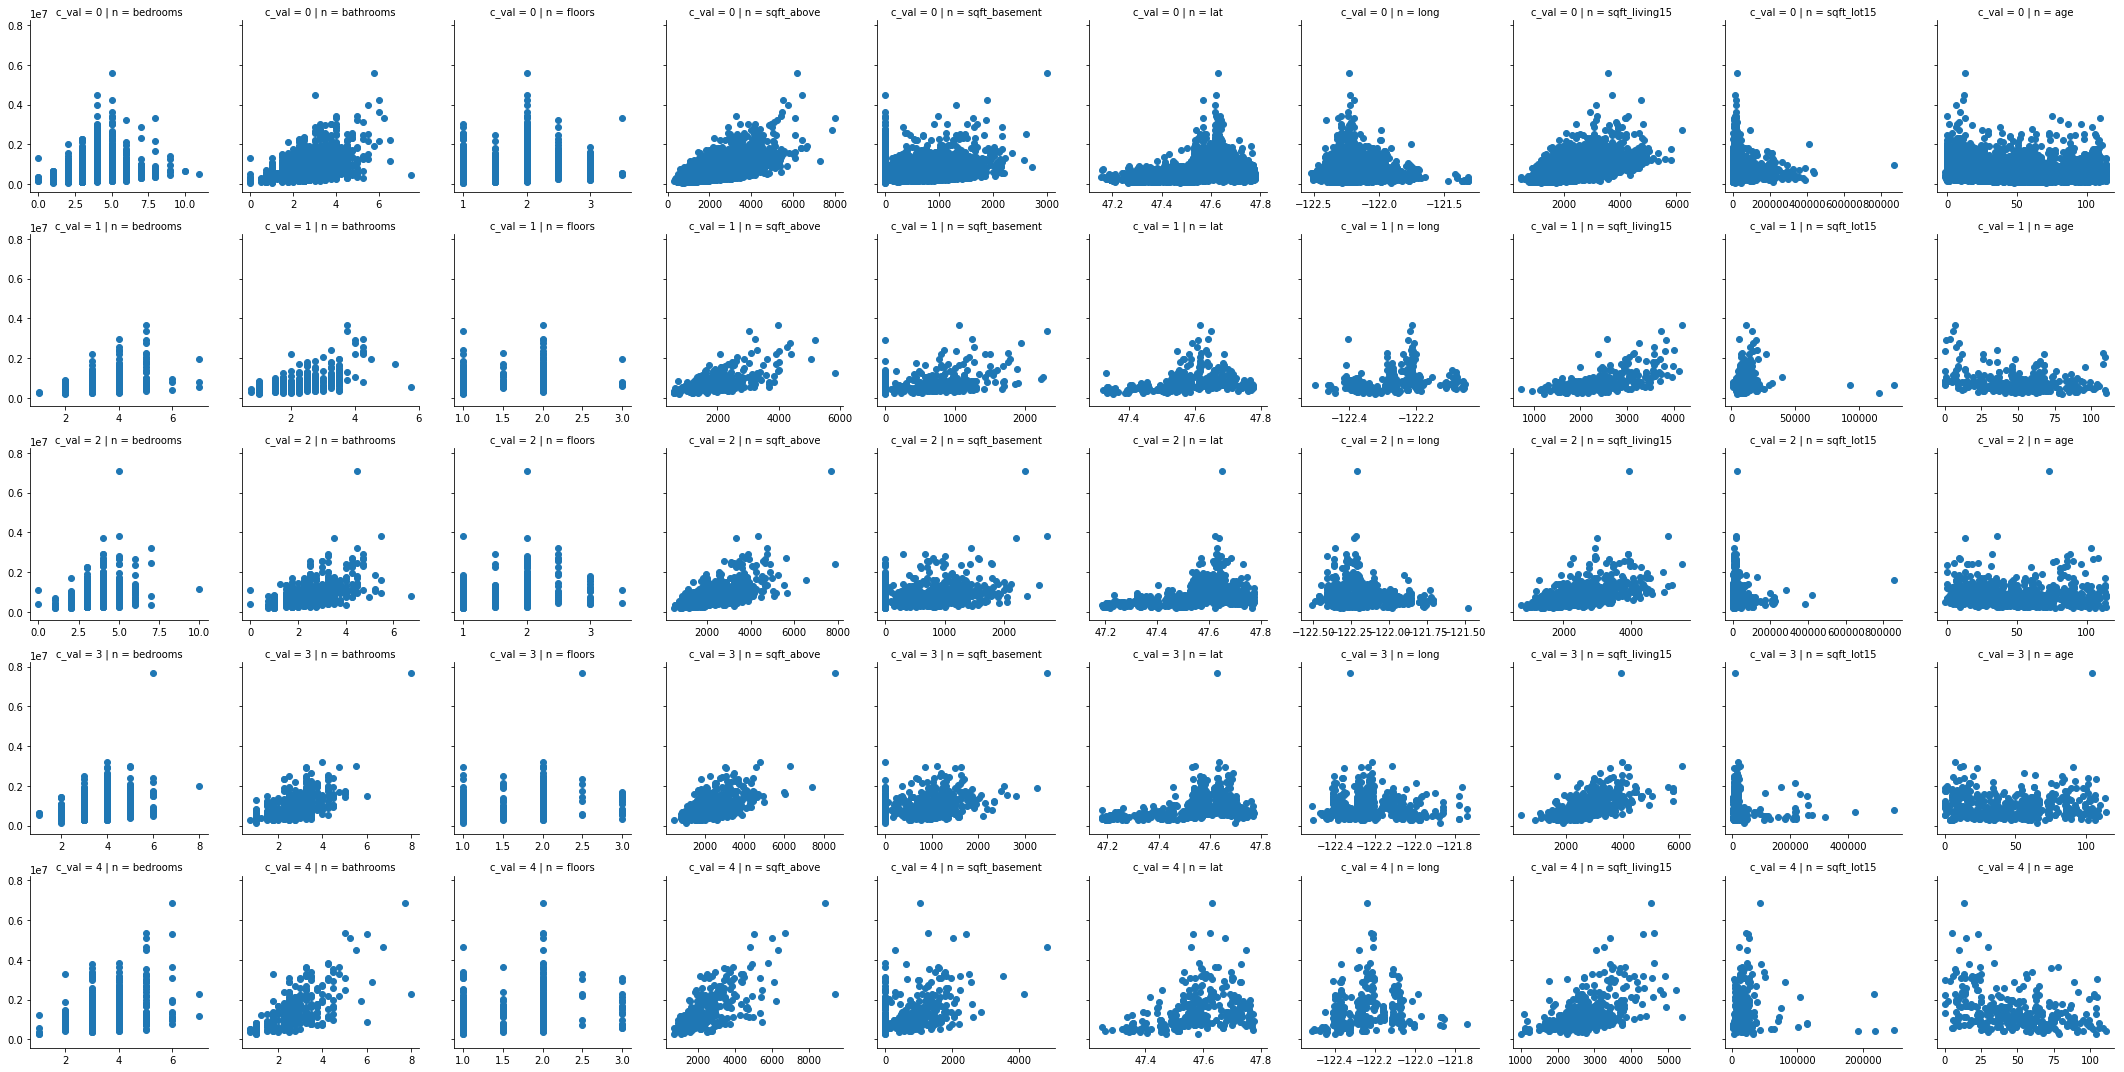

#### condition

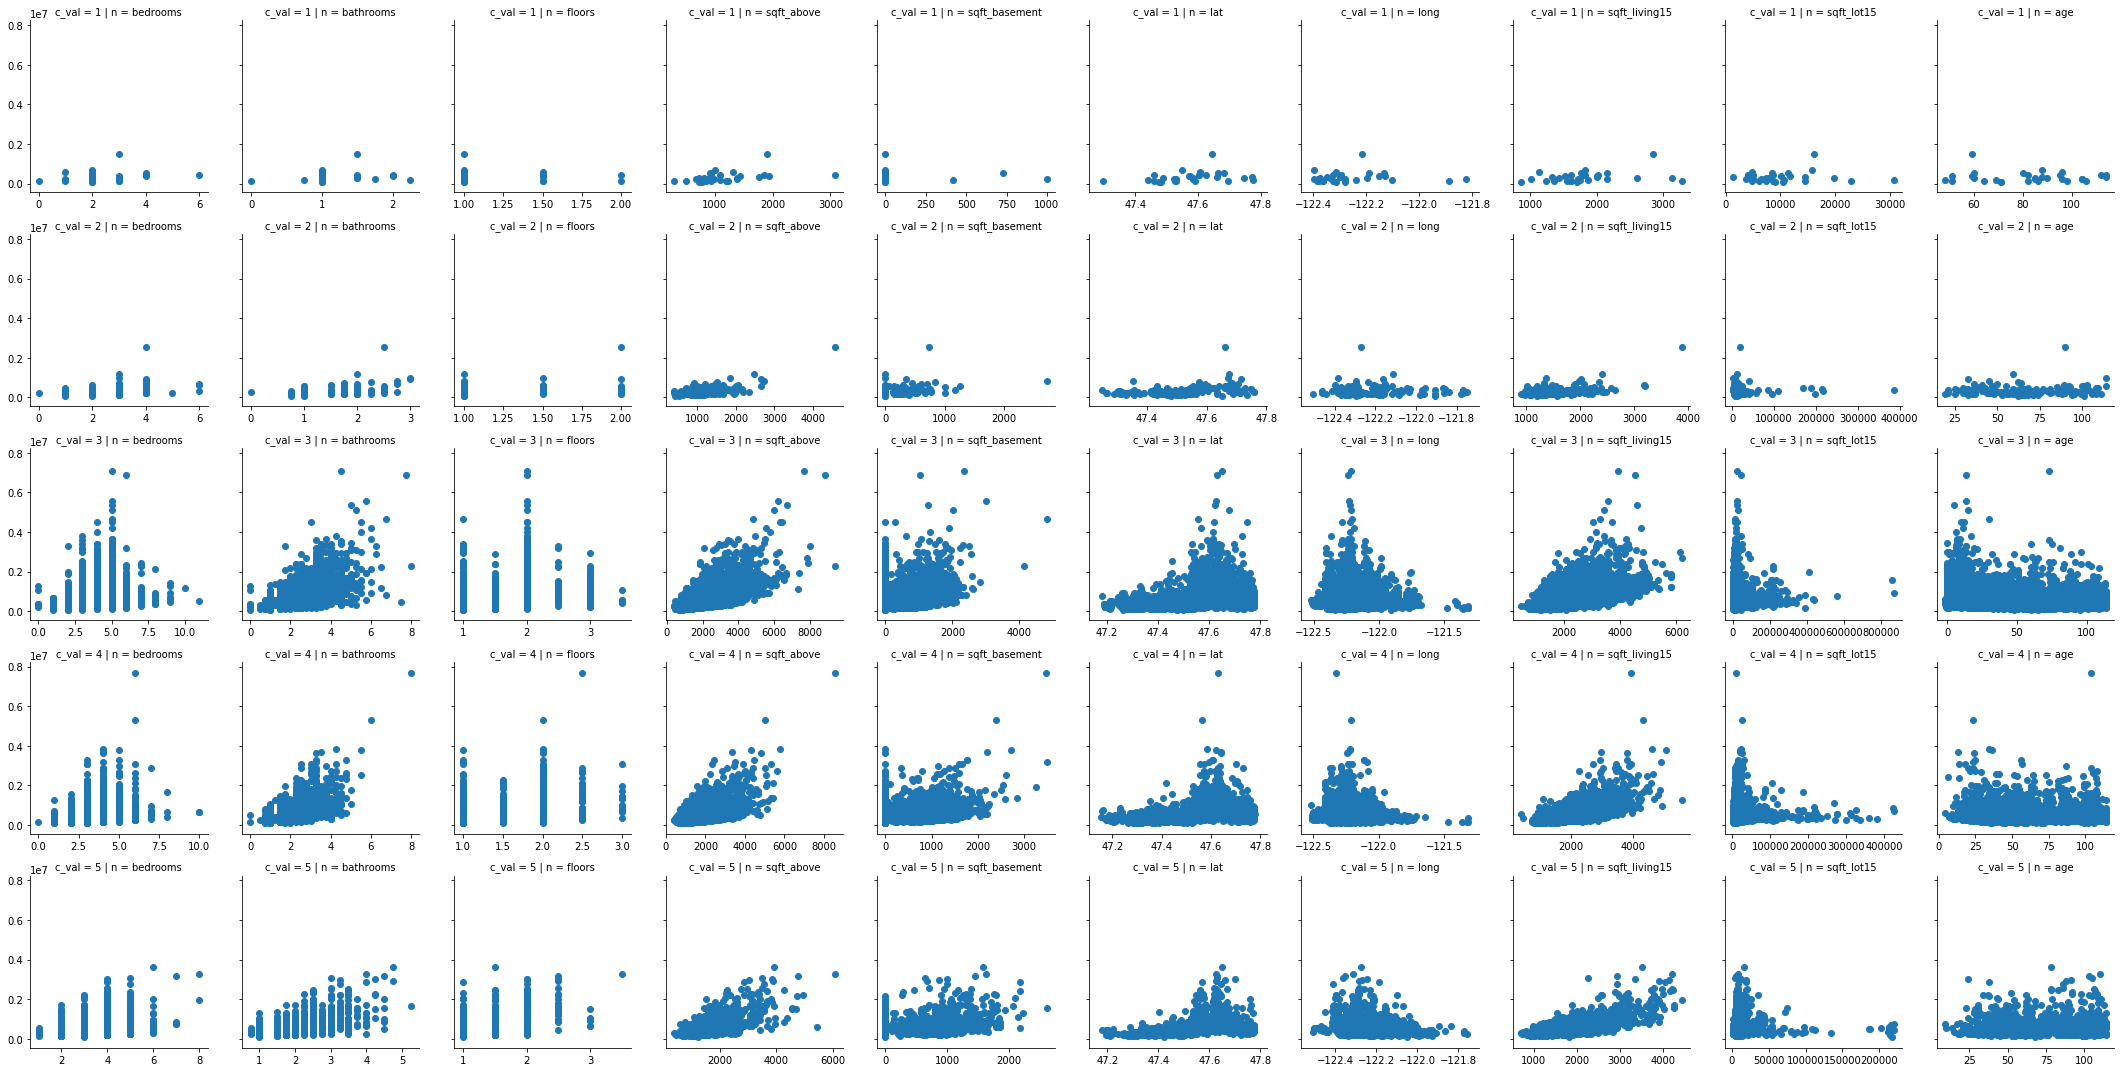

#### grade

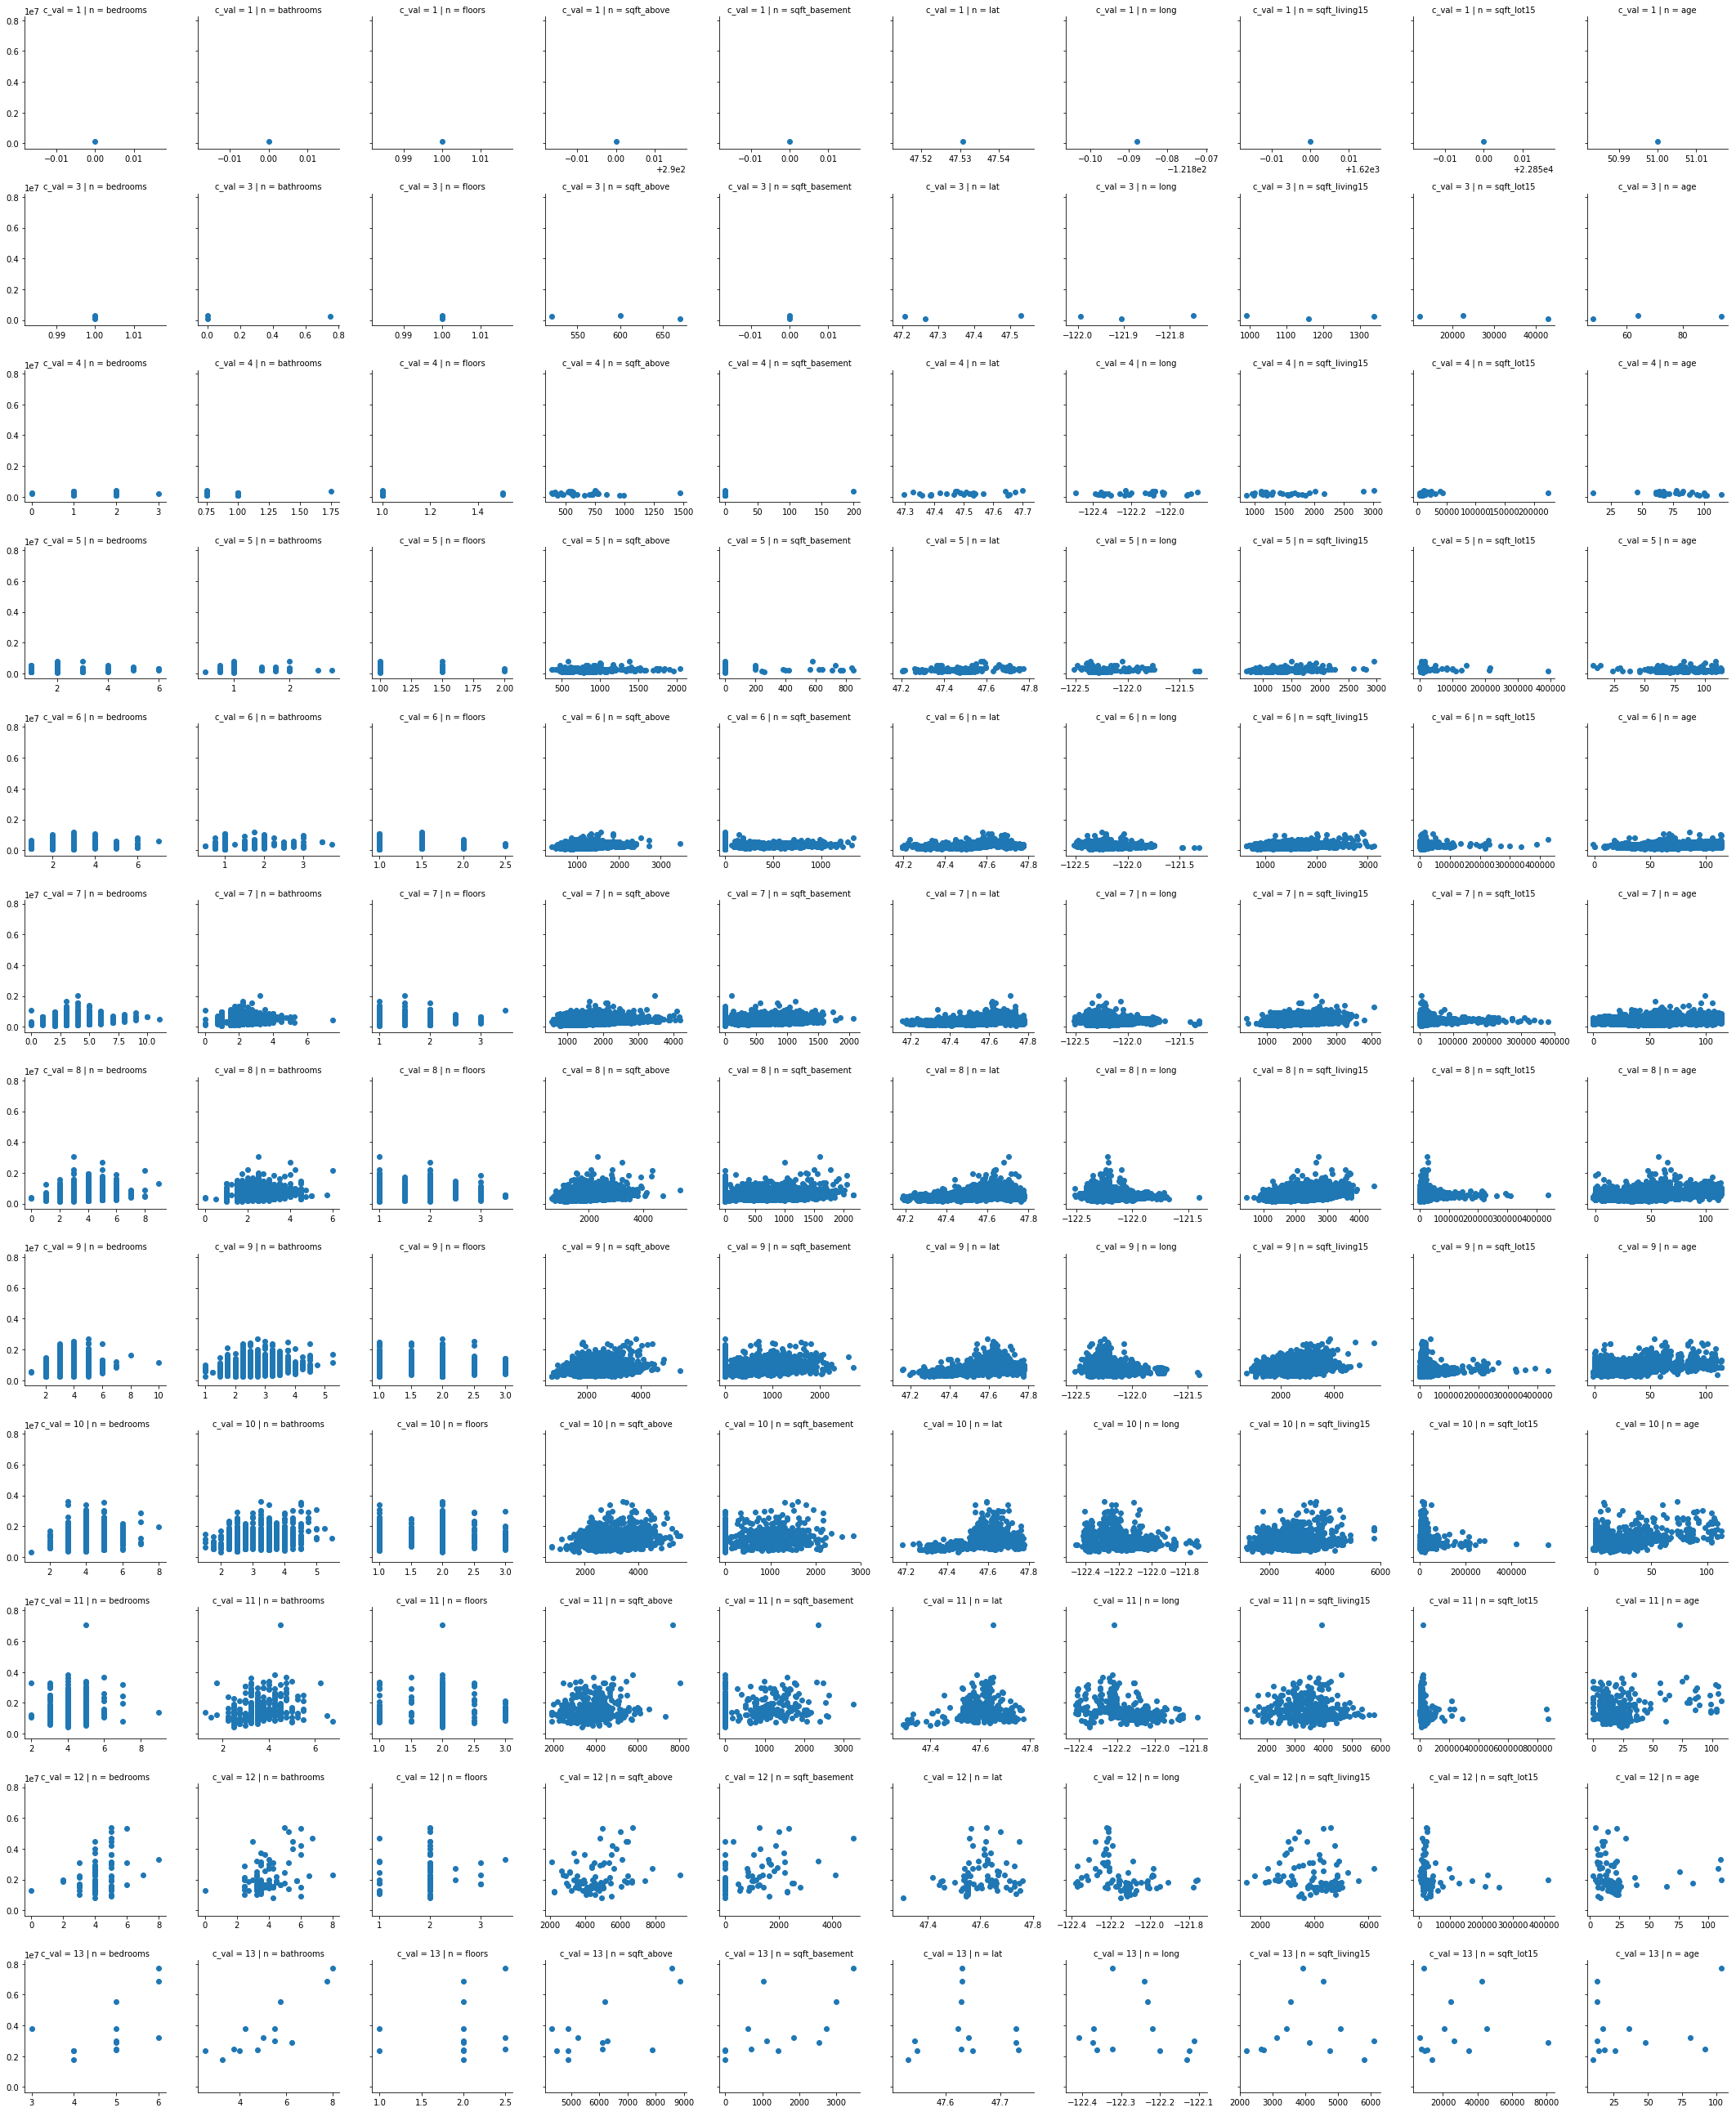

#### All Data

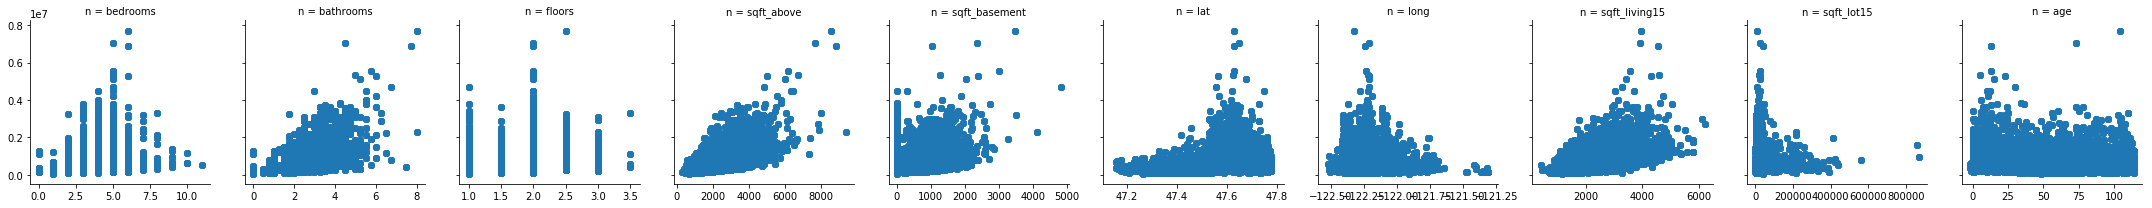

In [30]:
# Let's try making scatterplots for the different variables
for col in categorical_cols:
    display(Markdown('#### ' + col))
    g = sns.FacetGrid(data=df_long[df_long['c'] == col], row='c_val', col='n', sharex=False)
    g.map_dataframe(plt.scatter, x='n_val', y='price')
    plt.show()

display(Markdown('#### All Data'))
g = sns.FacetGrid(data=df_long, col='n', sharex=False)
g.map_dataframe(plt.scatter, x='n_val', y='price')
plt.show()

Above we see:
* Although we stratified the variables based on values from our different categorical variables, the overall trends tend to stay the same as for all our data, just to a lesser degree (as there are fewer datapoints when we stratify the data).
* Price vs:
  - Age: Not too big of a difference, but if anything, a slight decrease in price with age.  Other variables are likely more important.
  - sqft_lot15: There seems to be two populations of properties -- those that rapidly increase in property value with lot size, and those that do not.
  - Latitude and Longitude are kind of smeared, but, if anything, show a slight preference (price goes up) for things a bit more North and a bit more West.
  - Floors: No clear trend with price
  - All other features: More or less linearly increasing, although the dispersion does go up to.
  
Now, let's take a look at how linear regression does to model price.

# Linear Regression
## Preprocessing

In [31]:
# Here's a list of columns
display(df.columns)

# And the df dropping columns we don't want to train on
ml_df = df.drop(columns=['id', 'date', 'yr_built', 'cities'])

# Also, we wan't to convert the age to just how many years it's been
ml_df['age'] = ml_df.astype({'age': 'timedelta64[Y]'}).age
ml_df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'cities',
       'age'],
      dtype='object')

price  bedrooms  bathrooms  floors waterfront view condition grade  \
0  221900.0         3       1.00     1.0          0    0         3     7   
1  538000.0         3       2.25     2.0          0    0         3     7   
2  180000.0         2       1.00     1.0          0    0         3     6   
3  604000.0         4       3.00     1.0          0    0         5     7   
4  510000.0         3       2.00     1.0          0    0         3     8   

   sqft_above  sqft_basement  zipcode      lat     long  sqft_living15  \
0        1180              0    98178  47.5112 -122.257           1340   
1        2170            400    98125  47.7210 -122.319           1690   
2         770              0    98028  47.7379 -122.233           2720   
3        1050            910    98136  47.5208 -122.393           1360   
4        1680              0    98074  47.6168 -122.045           1800   

   sqft_lot15   age  
0        5650  59.0  
1        7639  63.0  
2        8062  81.0  
3        5000  49.0  
4        7503  27.0

In [32]:
# Zipcode is a nominal column (ordering doesn't matter), so let's
# encode it with dummy variables
ml_df = pd.get_dummies(ml_df, prefix='zipcode', columns=['zipcode'], drop_first=True)
with pd.option_context('max_columns', 10000):
    display(ml_df.head())

price  bedrooms  bathrooms  floors waterfront view condition grade  \
0  221900.0         3       1.00     1.0          0    0         3     7   
1  538000.0         3       2.25     2.0          0    0         3     7   
2  180000.0         2       1.00     1.0          0    0         3     6   
3  604000.0         4       3.00     1.0          0    0         5     7   
4  510000.0         3       2.00     1.0          0    0         3     8   

   sqft_above  sqft_basement      lat     long  sqft_living15  sqft_lot15  \
0        1180              0  47.5112 -122.257           1340        5650   
1        2170            400  47.7210 -122.319           1690        7639   
2         770              0  47.7379 -122.233           2720        8062   
3        1050            910  47.5208 -122.393           1360        5000   
4        1680              0  47.6168 -122.045           1800        7503   

    age  zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0  59.0              0              0              0              0   
1  63.0              0              0              0              0   
2  81.0              0              0              0              0   
3  49.0              0              0              0              0   
4  27.0              0              0              0              0   

   zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98014  zipcode_98019  zipcode_98022  zipcode_98023  zipcode_98024  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98027  zipcode_98028  zipcode_98029  zipcode_98030  zipcode_98031  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98032  zipcode_98033  zipcode_98034  zipcode_98038  zipcode_98039  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98040  zipcode_98042  zipcode_98045  zipcode_98052  zipcode_98053  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98055  zipcode_98056  zipcode_98058  zipcode_98059  zipcode_98065  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2             

In [33]:
# Now, we need to split our data into train/test sets
# (set the random state, so our notebook is completely reproducible)
df_train, df_test = sklearn.model_selection.train_test_split(ml_df, test_size=0.25, random_state=1234)

# confirm their relative sizes
df_train.shape, df_test.shape

((16209, 84), (5404, 84))

In [34]:
# Now, separate out our x/y, and perform scaling on the x's
y_train = df_train.price
x_train = df_train.drop(columns='price')
y_test = df_test.price
x_test = df_test.drop(columns='price')

# Now, do scaling
scaler = sklearn.preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Show that these values are indeed scaled
x_train[:2, :]

array([[ 1.78844938e+00,  8.23449122e-01,  9.37863969e-01,
        -8.67244704e-02, -3.05207923e-01, -6.31694154e-01,
         2.90776058e-01,  8.42061963e-01, -6.60712062e-01,
        -2.17451920e+00, -4.89635506e-01,  5.52221195e-01,
        -3.14816404e-01, -1.46564172e+00, -9.33403860e-02,
        -1.13457421e-01, -1.26928454e-01, -8.81572378e-02,
        -1.53683332e-01, -8.07472552e-02, -1.14844019e-01,
        -6.34528457e-02, -9.53373549e-02, -7.63745689e-02,
        -9.50073388e-02, -1.01100211e-01, -1.57221738e-01,
        -5.94051744e-02, -1.36854598e-01, -1.14567973e-01,
        -1.21028457e-01, -1.10920118e-01, -1.11488705e-01,
        -7.83916539e-02, -1.44383012e-01, -1.58453505e-01,
        -1.64289581e-01, -4.78320501e-02, -1.15941972e-01,
        -1.60487487e-01, -1.02952244e-01, -1.67041454e-01,
        -1.36620490e-01, -1.12898259e-01, -1.37321705e-01,
        -1.45271097e-01, -1.48340973e-01, -1.21813248e-01,
        -7.34598721e-02, -1.14567973e-01, -1.41914479e-0

## Model Fit

In [35]:
# Let's try Fitting the data using statsmodels.  First, it's easier
# to work in dataframes, so let's re-construct a training df
sm_train_df = pd.DataFrame(np.concatenate((y_train.values.reshape(-1,1), x_train), axis=1), columns=df_train.columns)
sm_train_df.head()

price  bedrooms  bathrooms    floors  waterfront      view  condition  \
0  309000.0  1.788449   0.823449  0.937864   -0.086724 -0.305208  -0.631694   
1  305000.0 -0.406604  -1.440557 -0.908588   -0.086724 -0.305208  -0.631694   
2  459000.0 -1.504131   0.500020  2.784316   -0.086724 -0.305208  -0.631694   
3  778000.0 -0.406604   0.176590 -0.908588   -0.086724 -0.305208   2.434373   
4  335000.0 -0.406604   0.500020  0.937864   -0.086724 -0.305208  -0.631694   

      grade  sqft_above  sqft_basement      ...        zipcode_98146  \
0  0.290776    0.842062      -0.660712      ...            -0.117301   
1 -0.559827   -1.053984      -0.660712      ...            -0.117301   
2  0.290776   -0.655706      -0.660712      ...            -0.117301   
3  1.141379   -0.112599       0.622949      ...            -0.117301   
4  0.290776    0.792579      -0.660712      ...            -0.117301   

   zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0       -0.04718      -0.146154      -0.109197      -0.114844       -0.11092   
1       -0.04718      -0.146154      -0.109197      -0.114844       -0.11092   
2       -0.04718      -0.146154      -0.109197      -0.114844       -0.11092   
3       -0.04718      -0.146154      -0.109197      -0.114844       -0.11092   
4       -0.04718      -0.146154      -0.109197      -0.114844       -0.11092   

   zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
0      -0.108908      -0.081518      -0.115119      -0.121291  
1      -0.108908      -0.081518      -0.115119      -0.121291  
2      -0.108908      -0.081518      -0.115119      -0.121291  
3      -0.108908      -0.081518      -0.115119      -0.121291  
4      -0.108908      -0.081518      -0.115119      -0.121291  

[5 rows x 84 columns]

In [36]:
# Now, let's fit a linear regression model
formula = 'price ~ ' +  ' + '.join(sm_train_df.drop(columns='price').columns.tolist())
print(formula)

# Construct the model/ fit
ols_model = sm.OLS.from_formula(formula=formula, data=sm_train_df)
ols_results = ols_model.fit()

# see the results
display(Markdown('### Regression Results'))
ols_results.summary()

price ~ bedrooms + bathrooms + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + lat + long + sqft_living15 + sqft_lot15 + age + zipcode_98002 + zipcode_98003 + zipcode_98004 + zipcode_98005 + zipcode_98006 + zipcode_98007 + zipcode_98008 + zipcode_98010 + zipcode_98011 + zipcode_98014 + zipcode_98019 + zipcode_98022 + zipcode_98023 + zipcode_98024 + zipcode_98027 + zipcode_98028 + zipcode_98029 + zipcode_98030 + zipcode_98031 + zipcode_98032 + zipcode_98033 + zipcode_98034 + zipcode_98038 + zipcode_98039 + zipcode_98040 + zipcode_98042 + zipcode_98045 + zipcode_98052 + zipcode_98053 + zipcode_98055 + zipcode_98056 + zipcode_98058 + zipcode_98059 + zipcode_98065 + zipcode_98070 + zipcode_98072 + zipcode_98074 + zipcode_98075 + zipcode_98077 + zipcode_98092 + zipcode_98102 + zipcode_98103 + zipcode_98105 + zipcode_98106 + zipcode_98107 + zipcode_98108 + zipcode_98109 + zipcode_98112 + zipcode_98115 + zipcode_98116 + zipcode_98117 + zipcode_98118 + zipcode_981

### Regression Results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     810.9
Date:                Fri, 01 Jun 2018   Prob (F-statistic):               0.00
Time:                        23:49:28   Log-Likelihood:            -2.1760e+05
No. Observations:               16209   AIC:                         4.354e+05
Df Residuals:                   16125   BIC:                         4.360e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.407e+05   1288.988    419.499      0.000    5.38e+05    5.43e+05
bedrooms      -2.865e+04   1712.581    -16.729      0.000    -3.2e+04   -2.53e+04
bathrooms      2.223e+04   2375.407      9.360      0.000    1.76e+04    2.69e+04
floors        -2.465e+04   2004.374    -12.296      0.000   -2.86e+04   -2.07e+04
waterfront     5.675e+04   1443.403     39.314      0.000    5.39e+04    5.96e+04
view           4.376e+04   1585.518     27.599      0.000    4.07e+04    4.69e+04
condition      1.546e+04   1450.042     10.664      0.000    1.26e+04    1.83e+04
grade          6.633e+04   2519.626     26.324      0.000    6.14e+04    7.13e+04
sqft_above     1.788e+05   2973.815     60.114      0.000    1.73e+05    1.85e+05
sqft_basement  5.953e+04   1861.601     31.980      0.000    5.59e+04    6.32e+04
lat            3.285e+04   1.04e+04      3.167      0.002    1.25e+04    5.32e+04
long          -1.489e+04   7303.307     -2.039      0.041   -2.92e+04    -575.841
sqft_living15  6752.7765   2321.565      2.909      0.004    2202.252    1.13e+04
sqft_lot15     2000.1262   1493.147      1.340      0.180    -926.608    4926.860
age            2.668e+04   2131.797     12.515      0.000    2.25e+04    3.09e+04
zipcode_98002  3198.3427   1614.614      1.981      0.048      33.521    6363.165
zipcode_98003 -1890.1443   1725.185     -1.096      0.273   -5271.699    1491.410
zipcode_98004   8.67e+04   3449.330     25.135      0.000    7.99e+04    9.35e+04
zipcode_98005  2.083e+04   2602.804      8.004      0.000    1.57e+04    2.59e+04
zipcode_98006  3.258e+04   3631.677      8.970      0.000    2.55e+04    3.97e+04
zipcode_98007  1.465e+04   2453.289      5.970      0.000    9838.094    1.95e+04
zipcode_98008  2.269e+04   3286.059      6.905      0.000    1.62e+04    2.91e+04
zipcode_98010  6898.5520   1707.819      4.039      0.000    3551.037    1.02e+04
zipcode_98011  2906.4798   3577.275      0.812      0.417   -4105.376    9918.335
zipcode_98014  4827.4035   3151.316      1.532      0.126   -1349.525     1.1e+04
zipcode_98019  2812.8064   3835.338      0.733      0.463   -4704.882    1.03e+04
zipcode_98022  4398.8722   2260.353      1.946      0.052     -31.671    8829.415
zipcode_98023 -7557.5313   2139.382     -3.533      0.000   -1.18e+04   -3364.106
zipcode_98024  7603.0724   2167.030      3.509      0.000    3355.453    1.19e+04
zipcode_98027  1.918e+04   3313.702      5.787      0.000    1.27e+04    2.57e+04
zipcode_98028  1215.2188   4163.600      0.292      0.770   -6945.900    9376.338
zipcode_98029  2.136e+04   3360.658      6.356      0.000    1.48e+04    2.79e+04
zipcode_98030   420.6450   1826.263      0.230      0.818   -3159.033    4000.323
zipcode_98031   342.3054   1937.412      0.177      0.860   -3455.237    4139.848
zipcode_98032  -452.6218   1555.347     -0.291   

We see quite a lot of features (84 features! plus the intercept) since we dummy-coded Zipcodes.  If we look at the results of our model fitting, though, we find the linear model is good for the data (Prob of F-statistic), but we do have quite a lot of features that weren't significant.  Let's capture the RMSE as a metric of how well our model did, then try Lasso Regression to see if we can prune some of these features.

In [37]:
# Calculate the RMSE of the model on the training data
train_RMSE = np.sqrt(sklearn.metrics.mean_squared_error(sm_train_df.price, ols_results.predict(sm_train_df.drop(columns='price'))))

# Now evaluate how well it did on test data
test_RMSE = np.sqrt(sklearn.metrics.mean_squared_error(df_test.price, ols_results.predict(df_test.drop(columns='price'))))
print('train_RMSE: {:,.2f}\ttest_RMSE: {:,.2f}'.format(train_RMSE, test_RMSE))

train_RMSE: 163,681.15	test_RMSE: 419,587,900.93


Looks like our Model did fairly well for the training data (RMSE ~163k), but not so well for the test data (RMSE ~419k).  Now, let's see what happens when we prune some of our features using regularization.

### Lasso Regression
_**I realize this work is more of a hack, but with limited time, this is the best I could do to try to reduce features and see what would come out.**_

In [38]:
# First, let's try to have sklearn pick a good alpha for us to run our lasso regression with.
# Define the lasso cross validation classifier
model = sklearn.linear_model.LassoCV(cv=20).fit(sm_train_df.drop(columns='price'), sm_train_df.price)

# The alpha the model selected
model.alpha_

248.1604040695085

In [39]:
# Now, construct the regularized model/ fit
reg_ols_results = ols_model.fit_regularized(alpha=model.alpha_, L1_wt=1)

# The hacked results below actually produced some nonsensical values, so
# let's just use drop the zero-valued parameters, and re-fit using a normal
# linear regression model
# See the results (need to hack this, since not actually implemented yet)
# github discussion: https://github.com/statsmodels/statsmodels/issues/3670
# From https://stackoverflow.com/questions/40072870/statistical-summary-table-in-sklearn-linear-model-ridge
#sm.regression.linear_model.OLSResults(ols_model, reg_ols_results.params, ols_results.normalized_cov_params).summary()

#### **All the columns**

Intercept      bedrooms     bathrooms        floors    waterfront  \
0  540481.018879 -28382.250565  22116.597744 -21807.204657  56401.116611   

           view     condition         grade     sqft_above  sqft_basement  \
0  43991.725485  15296.885971  68259.783585  176564.018956   60190.087508   

            lat          long  sqft_living15  sqft_lot15           age  \
0  90866.050238 -31910.667762    5843.052709  1028.02014  29445.529261   

   zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
0    2402.792023   -3765.354067   69744.532375    9442.379875   16932.451615   

   zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  zipcode_98014  \
0    4424.014854    8611.774394    7452.881404  -14900.539946            0.0   

   zipcode_98019  zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
0  -11234.455666   10530.933493  -10862.647744      3212.6379    8979.632732   

   zipcode_98028  zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  \
0  -20800.426166   10796.703581   -2306.024307   -4061.335188   -3442.018902   

   zipcode_98033  zipcode_98034  zipcode_98038  zipcode_98039  zipcode_98040  \
0   16029.506195   -9613.715044    5050.745612    55601.28601   38131.413955   

   zipcode_98042  zipcode_98045  zipcode_98052  zipcode_98053  zipcode_98055  \
0   -1241.699849    9055.903792            0.0            0.0   -5652.678744   

   zipcode_98056  zipcode_98058  zipcode_98059  zipcode_98065  zipcode_98070  \
0     -3993.4584   -5313.816533            0.0            0.0     -9360.7289   

   zipcode_98072  zipcode_98074  zipcode_98075  zipcode_98077  zipcode_98092  \
0  -13224.047842            0.0    2124.690744  -13009.829635   -2483.416197   

   zipcode_98102  zipcode_98103  zipcode_98105  zipcode_98106  zipcode_98107  \
0   20078.995031    9108.140317   20629.945901   -3226.203746    6756.113339   

   zipcode_98108  zipcode_98109  zipcode_98112  zipcode_98115  zipcode_98116  \
0   -4649.404954   17195.319484    43598.33416    8691.483588    9024.198713   

   zipcode_98117  zipcode_98118  zipcode_98119  zipcode_98122  zipcode_98125  \
0            0.0            0.0   20720.627094   13842.107156  -12329.672231   

   zipcode_98126  zipcode_98133  zipcode_98136  zipcode_98144  zipcode_98146  \
0            0.0  -20586.661038      6003.6897    9332.221586    -5287.82384   

   zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0   -2006.918071  -23329.590084   -7802.384423   -6831.409359   -10926.65426   

   zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
0  -10044.593931   -4771.201405   -8196.686229   14643.445859

#### **The largest/smallest 5 parameters**

long             -31910.667762
bedrooms         -28382.250565
zipcode_98155    -23329.590084
floors           -21807.204657
zipcode_98028    -20800.426166
grade             68259.783585
zipcode_98004     69744.532375
lat               90866.050238
sqft_above       176564.018956
Intercept        540481.018879
dtype: float64

#### **Just the magnitude of the largest/smallest 5**

zipcode_98126         0.000000
zipcode_98117         0.000000
zipcode_98118         0.000000
zipcode_98053         0.000000
zipcode_98059         0.000000
grade             68259.783585
zipcode_98004     69744.532375
lat               90866.050238
sqft_above       176564.018956
Intercept        540481.018879
dtype: float64

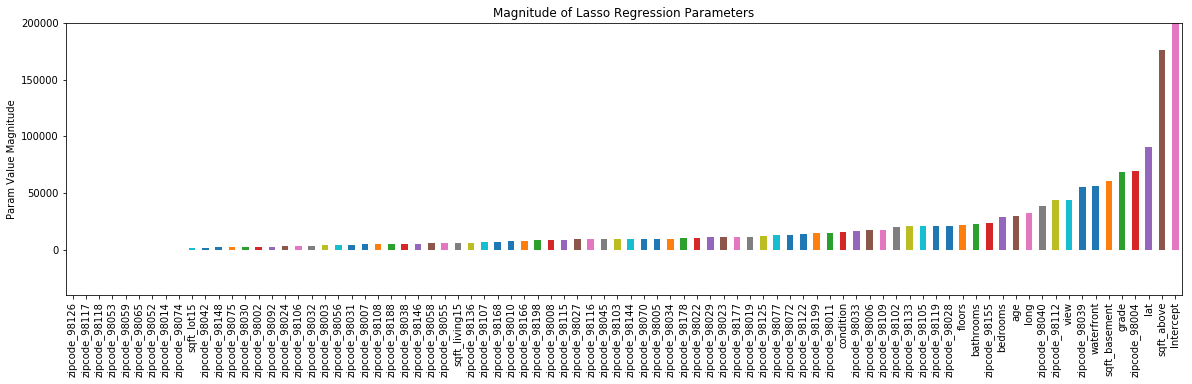

In [40]:
# Let's examine the model parameters from this regularized (L1) model
display(Markdown('#### **All the columns**'))
with pd.option_context('max_columns', 1000):
    display(reg_ols_results.params.to_frame().T)
    
display(Markdown('#### **The largest/smallest 5 parameters**'))
display(reg_ols_results.params.sort_values().iloc[np.r_[0:5, -5:0]])

# Now, let's make a plot of the magnitude of these columns
display(Markdown('#### **Just the magnitude of the largest/smallest 5**'))
display(reg_ols_results.params.abs().sort_values().iloc[np.r_[0:5, -5:0]])
ax = reg_ols_results.params.abs().sort_values().plot.bar(figsize=(20,5), ylim=(-40000,200000))
ax.set_ylabel('Param Value Magnitude')
ax.set_title('Magnitude of Lasso Regression Parameters')
plt.show()

We see quite the range in parmameter weights, with the largest weight going to the intercept (the plot was truncated so we could see the rest of the values, but the intercept is about $3\times$ greater than the next heighest weight, given to the number of square feet above ground.

One thing we notice -- the size of the living space (sqft_living15) is quite a ways down the list, but both sqft_above and sqft_basement are quite abit heigher up.  Perhaps if we had dropped these two, the sqft_living15 would be heigher up the list ...

Also, we notice that there are a few non-zipcode features that are given less weight than even a lot of the zipcode features, although all the features given zero weight are zipcode features.  And finally, some zip codes are even given more weight than some of your typical features that would be associated with a house price! (zipcode 98004 = Bellevue, for example, carries the 4th most weight).

Let's try trimming our list of features (more agressively than just what was done with the Lasso Regression), down to everything given a weight at least as large as condition (so, all featues to the right of and including condition), and see how this does.

In [41]:
# Now, let's cut everything above condition and see how well we do.
formula = ' + '.join(reg_ols_results.params.sort_values().loc['condition':'sqft_above'].index.tolist())
formula = 'price ~ ' + formula
print(formula)

# Run the regression again
trimmed_ols_model = sm.OLS.from_formula(formula=formula, data=sm_train_df)
trimmed_ols_results = trimmed_ols_model.fit()

# see the results
display(Markdown('### Trimmed Regression Results'))
trimmed_ols_results.summary()

price ~ condition + zipcode_98033 + zipcode_98006 + zipcode_98109 + zipcode_98102 + zipcode_98105 + zipcode_98119 + bathrooms + age + zipcode_98040 + zipcode_98112 + view + zipcode_98039 + waterfront + sqft_basement + grade + zipcode_98004 + lat + sqft_above


### Trimmed Regression Results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     2899.
Date:                Fri, 01 Jun 2018   Prob (F-statistic):               0.00
Time:                        23:49:40   Log-Likelihood:            -2.1891e+05
No. Observations:               16209   AIC:                         4.379e+05
Df Residuals:                   16189   BIC:                         4.380e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.407e+05   1394.710    387.700      0.000    5.38e+05    5.43e+05
condition      1.355e+04   1522.584      8.901      0.000    1.06e+04    1.65e+04
zipcode_98033  2.028e+04   1412.983     14.353      0.000    1.75e+04    2.31e+04
zipcode_98006  1.651e+04   1428.149     11.557      0.000    1.37e+04    1.93e+04
zipcode_98109  1.768e+04   1404.848     12.587      0.000    1.49e+04    2.04e+04
zipcode_98102  2.008e+04   1404.858     14.292      0.000    1.73e+04    2.28e+04
zipcode_98105  2.051e+04   1417.391     14.468      0.000    1.77e+04    2.33e+04
zipcode_98119  2.144e+04   1411.639     15.188      0.000    1.87e+04    2.42e+04
bathrooms      2.169e+04   2404.088      9.023      0.000     1.7e+04    2.64e+04
age            5.785e+04   1963.475     29.464      0.000     5.4e+04    6.17e+04
zipcode_98040  3.922e+04   1422.218     27.576      0.000    3.64e+04     4.2e+04
zipcode_98112   4.32e+04   1427.539     30.264      0.000    4.04e+04     4.6e+04
view           4.879e+04   1638.911     29.770      0.000    4.56e+04     5.2e+04
zipcode_98039  5.767e+04   1404.167     41.071      0.000    5.49e+04    6.04e+04
waterfront     5.371e+04   1530.337     35.098      0.000    5.07e+04    5.67e+04
sqft_basement  5.386e+04   1755.343     30.682      0.000    5.04e+04    5.73e+04
grade          9.861e+04   2479.872     39.763      0.000    9.37e+04    1.03e+05
zipcode_98004  7.238e+04   1413.501     51.208      0.000    6.96e+04    7.52e+04
lat            7.375e+04   1476.042     49.963      0.000    7.09e+04    7.66e+04
sqft_above     1.351e+05   2580.354     52.360      0.000     1.3e+05     1.4e+05
==============================================================================
Omnibus:                    14146.617   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2017194.511
Skew:                           3.601   Prob(JB):                         0.00
Kurtosis:                      57.175   Cond. No.                         4.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

condition  zipcode_98006  zipcode_98109  zipcode_98102  zipcode_98033  \
0  13553.083777   16505.012014   17683.448044   20078.574457   20280.465263   

   zipcode_98105  zipcode_98119     bathrooms  zipcode_98040  zipcode_98112  \
0   20506.577167   21440.623772  21691.424833   39219.496102   43202.717344   

           view    waterfront  sqft_basement  zipcode_98039           age  \
0  48791.120849  53711.881088   53857.122384    57670.45542  57850.920088   

   zipcode_98004           lat         grade     sqft_above      Intercept  
0   72382.025204  73747.490564  98607.579746  135107.408905  540729.179283

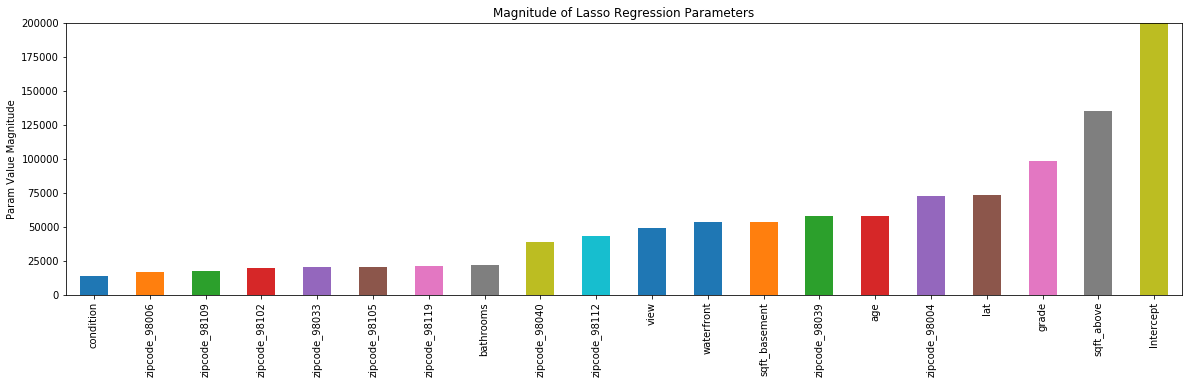

In [42]:
# Make plots of parameter magnitudes
with pd.option_context('max_columns', 1000):
    display(trimmed_ols_results.params.sort_values().to_frame().T)
    
ax = trimmed_ols_results.params.abs().sort_values().plot.bar(figsize=(20,5), ylim=(0,200000))
ax.set_ylabel('Param Value Magnitude')
ax.set_title('Magnitude of Lasso Regression Parameters')
plt.show()

In [43]:
# Figure out which cities the zipcodes are associated with
['{} = {}'.format(x, zipcodes[int(x)]) for x in '98004 98039 98112 98040 98119 98105 98033 98102 98106'.split()]

['98004 = BeauxArtsVillage,Bellevue,ClydeHill,HuntsPoint,YarrowPoint',
 '98039 = Medina',
 '98112 = Seattle',
 '98040 = MercerIsland',
 '98119 = Seattle',
 '98105 = Seattle',
 '98033 = Kirkland',
 '98102 = Seattle',
 '98106 = Seattle']

Now, we see that all 19 features (as well as the intercept) are significantly correlated to price.  Also, our adjusted $R^2$ went down from 0.806 to 0.773, but this is just based off of a measure of the training data, so let's look at our final RMSE metrics.  Finally, we notice once again that some locations (zipcodes) carry more weight than some of our other features, with the condition of the property (suprising!) carrying the least amount of weight.  Of these zip codes -- the Bellevue area proves to be the most expensive!

Now, let's take a look at that RMSE metric.

## Regression Comparison

In [44]:
# Let's calculate our RMSE's for the training and test datasets
trimmed_train_RMSE = np.sqrt(
    sklearn.metrics.mean_squared_error(sm_train_df.price,
                                       trimmed_ols_results.predict(sm_train_df.drop(columns='price'))))
trimmed_test_RMSE = np.sqrt(
    sklearn.metrics.mean_squared_error(df_test.price,
                                       trimmed_ols_results.predict(df_test.drop(columns='price'))))

# Now, let's make our comparisons
display(Markdown('**Full Regression**, *test_RMSE*: {:,.2f} &nbsp;&nbsp;&nbsp;&nbsp; *train_RMSE*: {:,.2f}'.format(test_RMSE, train_RMSE)))
display(Markdown('**Trimmed Regression**, *test_RMSE*: {:,.2f} &nbsp;&nbsp;&nbsp;&nbsp; *train_RMSE*: {:,.2f}'.format(trimmed_test_RMSE, trimmed_train_RMSE)))
display(Markdown('\n**% Difference in test_RMSE:** {:.2f}%'.format(100 * (trimmed_test_RMSE - test_RMSE)/ test_RMSE)))

**Full Regression**, *test_RMSE*: 419,587,900.93 &nbsp;&nbsp;&nbsp;&nbsp; *train_RMSE*: 163,681.15

**Trimmed Regression**, *test_RMSE*: 288,525,257.40 &nbsp;&nbsp;&nbsp;&nbsp; *train_RMSE*: 177,457.37


**% Difference in test_RMSE:** -31.24%

So, we see that although our training RMSE (along with our $R^2$ values) were worse for the trimmed model, the test set's RMSE was quite a bit better -- even to the amount of a 31% decrease in RMSE!  This shows that our original model with 85 parameters to fit really was over-fitting the data, while our new model does a better job at generalizing to new data.

# Conclusions
If all we care about is the final price that a home will sell for (or, at least, that it did between 2014 and 2015), then we see that there are quite a few features that relate to interesting correlations with price:

* In both our initial look at the raw data distributions, and in the weights given to our final trimmed linear regression, out of the categorical variables of waterfront, view, condition, and grade, we find that the correlations with price are as we expect (as you get a better view, etc, the price goes up).  However, we see strongly in the weights given to the trimmed linear regression that the categorical variable most strongly influencing price (out of these) is grade.
* As far as physical location goes, there is a trend of price rising as we examine properties from the sothern side of King County, to the northern side, and not as much as we go from west to east (except for a small strip of longitude, where the most expensive properties seem to exist at) -- this is supported in the fact that longitude did not make the trimmed list of features for our regression, and if we examine the scatterplot of longitude vs price, we see kind of a "triangular" shape, with the apex being somewhere in the middle of the longitude range.
* Age: although the "by-eye" examination of the age vs price scatterplot failed to reveal any strong correlation, it came out as the 6th strongest predictor variable.  **Surprisingly**, we find the coefficient on age to be positive -- this implies that with age, property values actually go up!  However, I suspect this is because there is a confounding of property location at play -- some of our oldest homes happened to be in locations where property values were the highest, so if we were to look within location categories, I suspect that we'll see the trend with age that we expect (perhaps we could do a mixed effects model to test for the effect of location and age together).
* Another point about location -- some zip codes came out with greater weight than some of our typical housing variables, showing that location really does matter in determining the housing prices.
* Size: Out of all our features, this carried the most weight, showing that the size of the building above ground is the most important in determining the price.

## Action Steps
What to do with the conclusions above depends on if one is a current homeowner, or a homebuyer.  If one already owns a home, we see that building grade strongly influences price, so one could upgrade the building materials used for the home to see significant price gains in property value.  One could also do additional renovations to increase the size of the house (such as adding an extra bedroom/ bathroom, etc), and similarly see property value gains.

If one is a buyer on the other hand, and price is the single most important determining factor (perhaps one is a first-time homebuyer and funds are scarce), then one could balance the above features to find what features one wants, and which are less important -- once again, settling for a smaller house would have the greatest impact in providing a lower priced property, but if requires a certain sized home as well, location is an easy way to lower the price (don't look in the Bellevue area, as that tends to be expensive).

## Future Directions
We could try other methods of selecting our features to see if we can develop a better model of the data (such as what we may select from our correlation clustering).  Alternatively, we could also use other types of machine learning models that might do a better predictive job (and as such, also do a better job at identifying relevant features, with perhaps non-linear effects).